# Welcome to the BCG X Job simulation Project

In this project i'm working as a junior data scientist

### Methodology

To sucessfully complete this job simulation i have to follow this 5-step methodology:

1. **Business understanding & problem framing:** what is the context of this problem and why are they trying to solve it?
 
2. **Exploratory data analysis & data cleaning:** what data are we working with, what does it look like and how can we make it better?
 
3. **Feature engineering:** can we enrich this dataset using our own expertise or third party information?
 
4. **Modeling and evaluation:** can we use this dataset to accurately make predictions? If so, are they reliable?
 
5. **Insights & Recommendations:** how we can communicate the value of these predictions by explaining them in a way that matters to the business?


## TASK ONE -- Understanding the business problem 

## PowerCo Business Problem

The Associate Director of the Data Science team held a team meeting to discuss the client brief. I’ll be working closely with a senior data scientist on the team.

Here are the key takeaways from the meeting:

Our client is PowerCo - a major gas and electricity utility that supplies to small and medium sized enterprises. The energy market has had a lot of change in recent years and there are more options than ever for customers to choose from. PowerCo are concerned about their customers leaving for better offers from other energy providers. Basically, worried about the churn rate. This is becoming a big issue for them and they have engaged us to help diagnose the reason why their customers are churning and offer possible solutions.

During the meeting our director also discussed some potential reasons for this churn, 

He said maybe, one reason for churning could be how “sensitive” the price is. In other words, how much is price a factor in a customer’s choice to stay with or leave PowerCo?

All these and many more i will investiage with my team 

## Expectation

Our Associate Director of the Data Science team  wants me  and the team to email him by COB today outlining:

1. the data that we’ll need from the client, and

2. the techniques we’ll use to investigate the issue.

# My understanding  and conclusion i sent to my team lead -- using the 5-step methodology 

1. **Business Understanding & Problem Framing**


PowerCo is likely experiencing customers switching to competitors. we need to understand what factors influence customer retention and identify opportunities to reduce churn.

We could frame the problem as:

“What are the main drivers/factors behind customer churn at PowerCo, and how can we predict which customers are likely to leave?”


2. **Data Requirements** -- ( data we from PowerCo)

To effectively explore the problem, we will need the following data points:

**Customer Demographics:** Age, income bracket, location (region, urban/rural), type of customer (residential/business)

**Contract Details:** Plan type, tenure (how long they've been with PowerCo), monthly charges, contract length, renewable vs. non-renewable energy option

**Usage Data:** Historical electricity usage (monthly/seasonal patterns)

**Customer Interactions:** Service requests, complaints, resolution times, call center contacts

**Billing History:** Payment behavior, late payments, discounts offered

**Marketing Touchpoints:** Emails sent, promotional offers received, whether they responded

**Churn Labels:** Whether a customer has churned (yes/no)

WE  WOULD REQUEST THE ABOVE DATA FEATURES FROM POWERCO AND GIVE THEM TIME TO PROVIDE ALL WE REQUEST OF. 


3. **Data Preparation & Cleaning**

Once we receive the data we request, we can then inspect it for missing values, inconsistencies, and outliers. We’ll engineer useful features such as average usage and many more.

4. **Modeling Techniques & Exploratory Analysis**

We will apply the following approaches:

**Exploratory Data Analysis (EDA):**

-- Correlation heatmaps to find links between churn and customer features

-- Distribution plots for variables like pricing, tenure, usage and many more depends the features that are available to us.

-- Grouped bar charts for churn by region, plan type, etc.


**Statistical & Machine Learning Techniques:**

We will build different machine learning algorithms like 
1. Logistic regression to identify key churn predictors

2. Gradient Boosting

3.  Random forest

4.  Voting

5.  XGBoost and many more  

6. Clustering (e.g., k-means,PCA) to identify customer segments

7. We create an AI agent ( RAG system ) to analysis customer complaints 


i will also perform feature importance analysis to understand which variables most influence churn


5. **Evaluation & Insights Delivery**

Once modeling is complete, we’ll present:

1. Key churn drivers

2. Profiles of customers most likely to churn

3. Recommended interventions to help reduce customer churning

   

**Initial Hypotheses:** Why Customers Might Switch Providers

We suspect the following factors may be influencing churn:

1. Proximity - Maybe a new eneryg provider is closer.

2. Price Sensitivity – Customers switching due to better offers elsewhere

3. Customer Service Quality – Frustration over delayed support or unresolved issues

4. Contract Inflexibility – Long-term contracts or hidden fees

To mention a few, these might be the factors affecting high churn rate. However, this is not statistically proven yet as we are yet to get data from PowerCo

# TASK TWO -  Exploratory Data Analysis

Now, the work has officially begun! After a few weeks of waiting on PowerCo to provide the necessary data, we’ve finally received two key datasets: price data and client data.

My next step is to analyze both datasets and perform exploratory data analysis (EDA) to understand their structure, quality, and any initial patterns or insights. This will help shape the direction of our analysis and inform any necessary preprocessing steps before modeling.

In [232]:
## All libraries used

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import numpy as np
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score
import warnings
warnings.simplefilter(action= 'ignore')

In [108]:
# Load the client data

client_df = pd.read_csv(r'/Users/sot/Downloads/client_data (1).csv')

In [258]:
client_df.head(5)

id                     channel_sales  \
0  24011ae4ebbe3035111d65fa7c15bc57  foosdfpfkusacimwkcsosbicdxkicaua   
1  d29c2c54acc38ff3c0614d0a653813dd                           MISSING   
2  764c75f661154dac3a6c254cd082ea7d  foosdfpfkusacimwkcsosbicdxkicaua   
3  bba03439a292a1e166f80264c16191cb  lmkebamcaaclubfxadlmueccxoimlema   
4  149d57cf92fc41cf94415803a877cb4b                           MISSING   

   cons_12m  cons_gas_12m  cons_last_month  date_activ    date_end  \
0         0         54946                0  2013-06-15  2016-06-15   
1      4660             0                0  2009-08-21  2016-08-30   
2       544             0                0  2010-04-16  2016-04-16   
3      1584             0                0  2010-03-30  2016-03-30   
4      4425             0              526  2010-01-13  2016-03-07   

  date_modif_prod date_renewal  forecast_cons_12m  forecast_cons_year  \
0      2015-11-01   2015-06-23               0.00                   0   
1      2009-08-21   2015-08-31             189.95                   0   
2      2010-04-16   2015-04-17              47.96                   0   
3      2010-03-30   2015-03-31             240.04                   0   
4      2010-01-13   2015-03-09             445.75                 526   

   forecast_discount_energy  forecast_meter_rent_12m  \
0                       0.0                     1.78   
1                       0.0                    16.27   
2                       0.0                    38.72   
3                       0.0                    19.83   
4                       0.0                   131.73   

   forecast_price_energy_off_peak  forecast_price_energy_peak  \
0                        0.114481                    0.098142   
1                        0.145711                    0.000000   
2                        0.165794                    0.087899   
3                        0.146694                    0.000000   
4                        0.116900                    0.100015   

   forecast_price_pow_off_peak has_gas  imp_cons  margin_gross_pow_ele  \
0                    40.606701       t      0.00                 25.44   
1                    44.311378       f      0.00                 16.38   
2                    44.311378       f      0.00                 28.60   
3                    44.311378       f      0.00                 30.22   
4                    40.606701       f     52.32                 44.91   

   margin_net_pow_ele  nb_prod_act  net_margin  num_years_antig  \
0               25.44            2      678.99                3   
1               16.38            1       18.89                6   
2               28.60            1        6.60                6   
3               30.22            1       25.46                6   
4               44.91            1       47.98                6   

                          origin_up  pow_max  churn  
0  lxidpiddsbxsbosboudacockeimpuepw   43.648      1  
1  kamkkxfxxuwbdslkwifmmcsiusiuosws   13.800      0  
2  kamkkxfxxuwbdslkwifmmcsiusiuosws   13.856      0  
3  kamkkxfxxuwbdslkwifmmcsiusiuosws   13.200      0  
4  kamkkxfxxuwbdslkwifmmcsiusiuosws   19.800      0

🔍 Quick Insight

It's immediately clear that we cannot proceed with creating an AI agent, as customer complaints data was not provided by PowerCo. we also have a mix of numeric and categorical data, which we will need to transform before modelling later



In [110]:
# Load the price data

price_df = pd.read_csv(r'/Users/sot/Downloads/price_data (1).csv')

In [111]:
price_df.head()

id  price_date  price_off_peak_var  \
0  038af19179925da21a25619c5a24b745  2015-01-01            0.151367   
1  038af19179925da21a25619c5a24b745  2015-02-01            0.151367   
2  038af19179925da21a25619c5a24b745  2015-03-01            0.151367   
3  038af19179925da21a25619c5a24b745  2015-04-01            0.149626   
4  038af19179925da21a25619c5a24b745  2015-05-01            0.149626   

   price_peak_var  price_mid_peak_var  price_off_peak_fix  price_peak_fix  \
0             0.0                 0.0           44.266931             0.0   
1             0.0                 0.0           44.266931             0.0   
2             0.0                 0.0           44.266931             0.0   
3             0.0                 0.0           44.266931             0.0   
4             0.0                 0.0           44.266931             0.0   

   price_mid_peak_fix  
0                 0.0  
1                 0.0  
2                 0.0  
3                 0.0  
4                 0.0

Before i move forward i really need to understand what each feature means as i currently do not understand. i will need to understand the dataset description

# DATASET DICTIONARY 

### client_data.csv

 ● id = client company identifier

● activity_new = category of the company’s activity

● channel_sales = code of the sales channel

● cons_12m = electricity consumption of the past 12 months

● cons_gas_12m = gas consumption of the past 12 months

● cons_last_month = electricity consumption of the last month

● date_activ = date of activation of the contract

● date_end = registered date of the end of the contract

● date_modif_prod = date of the last modification of the product

● date_renewal = date of the next contract renewal

● forecast_cons_12m = forecasted electricity consumption for next 12 months

● forecast_cons_year = forecasted electricity consumption for the next calendar year

● forecast_discount_energy = forecasted value of current discount

● forecast_meter_rent_12m = forecasted bill of meter rental for the next 2 months

● forecast_price_energy_off_peak = forecasted energy price for 1st period (off peak)

● forecast_price_energy_peak = forecasted energy price for 2nd period (peak)

● forecast_price_pow_off_peak = forecasted power price for 1st period (off peak)

● has_gas = indicated if client is also a gas client

● imp_cons = current paid consumption

● margin_gross_pow_ele = gross margin on power subscription

● margin_net_pow_ele = net margin on power subscription

● nb_prod_act = number of active products and services

● net_margin = total net margin

● num_years_antig = antiquity of the client (in number of years)

● origin_up = code of the electricity campaign the customer first subscribed to

● pow_max = subscribed power

● churn = has the client churned over the next 3 months

### price_data.csv

● id = client company identifier

● price_date = reference date

● price_off_peak_var = price of energy for the 1st period (off peak)

● price_peak_var = price of energy for the 2nd period (peak)

● price_mid_peak_var = price of energy for the 3rd period (mid peak)

● price_off_peak_fix = price of power for the 1st period (off peak)

● price_peak_fix = price of power for the 2nd period (peak)

● price_mid_peak_fix = price of power for the 3rd period (mid peak)



**THIS IS VERY IMPORTANT FOR ME HELPS ME TO UNDERSTAND EACH FEATURE**

##  Descriptive statistics of data

### Data types

It is useful to first understand the data that you're dealing with along with the data types of each column. The data types may dictate how you transform and engineer features.

In [117]:
## I want to see all the columns

pd.set_option('display.max_columns', None)

In [118]:
client_df.head(2)

id                     channel_sales  \
0  24011ae4ebbe3035111d65fa7c15bc57  foosdfpfkusacimwkcsosbicdxkicaua   
1  d29c2c54acc38ff3c0614d0a653813dd                           MISSING   

   cons_12m  cons_gas_12m  cons_last_month  date_activ    date_end  \
0         0         54946                0  2013-06-15  2016-06-15   
1      4660             0                0  2009-08-21  2016-08-30   

  date_modif_prod date_renewal  forecast_cons_12m  forecast_cons_year  \
0      2015-11-01   2015-06-23               0.00                   0   
1      2009-08-21   2015-08-31             189.95                   0   

   forecast_discount_energy  forecast_meter_rent_12m  \
0                       0.0                     1.78   
1                       0.0                    16.27   

   forecast_price_energy_off_peak  forecast_price_energy_peak  \
0                        0.114481                    0.098142   
1                        0.145711                    0.000000   

   forecast_price_pow_off_peak has_gas  imp_cons  margin_gross_pow_ele  \
0                    40.606701       t       0.0                 25.44   
1                    44.311378       f       0.0                 16.38   

   margin_net_pow_ele  nb_prod_act  net_margin  num_years_antig  \
0               25.44            2      678.99                3   
1               16.38            1       18.89                6   

                          origin_up  pow_max  churn  
0  lxidpiddsbxsbosboudacockeimpuepw   43.648      1  
1  kamkkxfxxuwbdslkwifmmcsiusiuosws   13.800      0

In [112]:
client_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              14606 non-null  object 
 1   channel_sales                   14606 non-null  object 
 2   cons_12m                        14606 non-null  int64  
 3   cons_gas_12m                    14606 non-null  int64  
 4   cons_last_month                 14606 non-null  int64  
 5   date_activ                      14606 non-null  object 
 6   date_end                        14606 non-null  object 
 7   date_modif_prod                 14606 non-null  object 
 8   date_renewal                    14606 non-null  object 
 9   forecast_cons_12m               14606 non-null  float64
 10  forecast_cons_year              14606 non-null  int64  
 11  forecast_discount_energy        14606 non-null  float64
 12  forecast_meter_rent_12m         

i see that all of the `datetime` related columns on this client data are not currently in datetime format. I will need to convert these later.

In [115]:
price_df.head(2)

id  price_date  price_off_peak_var  \
0  038af19179925da21a25619c5a24b745  2015-01-01            0.151367   
1  038af19179925da21a25619c5a24b745  2015-02-01            0.151367   

   price_peak_var  price_mid_peak_var  price_off_peak_fix  price_peak_fix  \
0             0.0                 0.0           44.266931             0.0   
1             0.0                 0.0           44.266931             0.0   

   price_mid_peak_fix  
0                 0.0  
1                 0.0

In [114]:
price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193002 entries, 0 to 193001
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  193002 non-null  object 
 1   price_date          193002 non-null  object 
 2   price_off_peak_var  193002 non-null  float64
 3   price_peak_var      193002 non-null  float64
 4   price_mid_peak_var  193002 non-null  float64
 5   price_off_peak_fix  193002 non-null  float64
 6   price_peak_fix      193002 non-null  float64
 7   price_mid_peak_fix  193002 non-null  float64
dtypes: float64(6), object(2)
memory usage: 11.8+ MB


i also see that the `datetime` related column on this price data is not  currently in datetime format. I will need to convert later.

### Statistics

Now let me  look at some statistics about the datasets

In [119]:
client_df.describe().transpose()

count           mean            std  min  \
cons_12m                        14606.0  159220.286252  573465.264198  0.0   
cons_gas_12m                    14606.0   28092.375325  162973.059057  0.0   
cons_last_month                 14606.0   16090.269752   64364.196422  0.0   
forecast_cons_12m               14606.0    1868.614880    2387.571531  0.0   
forecast_cons_year              14606.0    1399.762906    3247.786255  0.0   
forecast_discount_energy        14606.0       0.966726       5.108289  0.0   
forecast_meter_rent_12m         14606.0      63.086871      66.165783  0.0   
forecast_price_energy_off_peak  14606.0       0.137283       0.024623  0.0   
forecast_price_energy_peak      14606.0       0.050491       0.049037  0.0   
forecast_price_pow_off_peak     14606.0      43.130056       4.485988  0.0   
imp_cons                        14606.0     152.786896     341.369366  0.0   
margin_gross_pow_ele            14606.0      24.565121      20.231172  0.0   
margin_net_pow_ele              14606.0      24.562517      20.230280  0.0   
nb_prod_act                     14606.0       1.292346       0.709774  1.0   
net_margin                      14606.0     189.264522     311.798130  0.0   
num_years_antig                 14606.0       4.997809       1.611749  1.0   
pow_max                         14606.0      18.135136      13.534743  3.3   
churn                           14606.0       0.097152       0.296175  0.0   

                                        25%           50%           75%  \
cons_12m                        5674.750000  14115.500000  40763.750000   
cons_gas_12m                       0.000000      0.000000      0.000000   
cons_last_month                    0.000000    792.500000   3383.000000   
forecast_cons_12m                494.995000   1112.875000   2401.790000   
forecast_cons_year                 0.000000    314.000000   1745.750000   
forecast_discount_energy           0.000000      0.000000      0.000000   
forecast_meter_rent_12m           16.180000     18.795000    131.030000   
forecast_price_energy_off_peak     0.116340      0.143166      0.146348   
forecast_price_energy_peak         0.000000      0.084138      0.098837   
forecast_price_pow_off_peak       40.606701     44.311378     44.311378   
imp_cons                           0.000000     37.395000    193.980000   
margin_gross_pow_ele              14.280000     21.640000     29.880000   
margin_net_pow_ele                14.280000     21.640000     29.880000   
nb_prod_act                        1.000000      1.000000      1.000000   
net_margin                        50.712500    112.530000    243.097500   
num_years_antig                    4.000000      5.000000      6.000000   
pow_max                           12.500000     13.856000     19.172500   
churn                              0.000000      0.000000      0.000000   

                                         max  
cons_12m                        6.207104e+06  
cons_gas_12m                    4.154590e+06  
cons_last_month                 7.712030e+05  
forecast_cons_12m               8.290283e+04  
forecast_cons_year              1.753750e+05  
forecast_discount_energy        3.000000e+01  
forecast_meter_rent_12m         5.993100e+02  
forecast_price_energy_off_peak  2.739630e-01  
forecast_price_energy_peak      1.959750e-01  
forecast_price_pow_off_peak     5.926638e+01  
imp_cons                        1.504279e+04  
margin_gross_pow_ele            3.746400e+02  
margin_net_pow_ele              3.746400e+02  
nb_prod_act                     3.200000e+01  
net_margin                      2.457065e+04  
num_years_antig                 1.300000e+01  
pow_max                         3.200000e+02  
churn                           1.000000e+00

The describe method gives us a lot of information about the client data. The key point to take away from this is that we have highly skewed data, as exhibited by the percentile values.

In [120]:
price_df.describe().transpose()

count       mean        std  min        25%        50%  \
price_off_peak_var  193002.0   0.141027   0.025032  0.0   0.125976   0.146033   
price_peak_var      193002.0   0.054630   0.049924  0.0   0.000000   0.085483   
price_mid_peak_var  193002.0   0.030496   0.036298  0.0   0.000000   0.000000   
price_off_peak_fix  193002.0  43.334477   5.410297  0.0  40.728885  44.266930   
price_peak_fix      193002.0  10.622875  12.841895  0.0   0.000000   0.000000   
price_mid_peak_fix  193002.0   6.409984   7.773592  0.0   0.000000   0.000000   

                          75%        max  
price_off_peak_var   0.151635   0.280700  
price_peak_var       0.101673   0.229788  
price_mid_peak_var   0.072558   0.114102  
price_off_peak_fix  44.444710  59.444710  
price_peak_fix      24.339581  36.490692  
price_mid_peak_fix  16.226389  17.458221

The price data looks fine but i will explore further later 

# EDA on client data

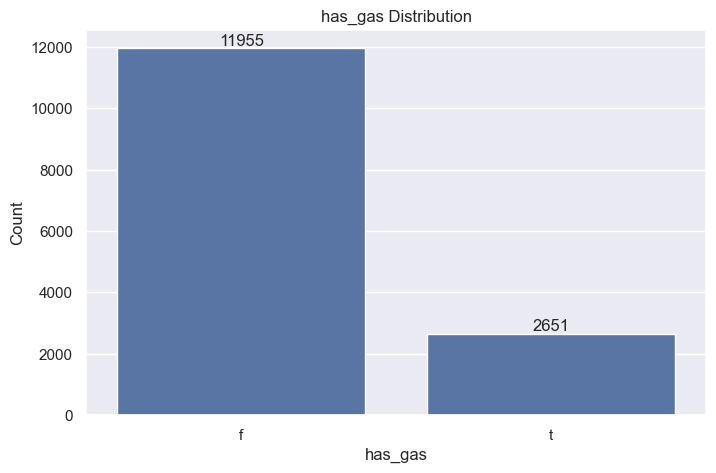

In [13]:
gas_counts = client_df['has_gas'].value_counts().sort_values(ascending=False)
plt.figure(figsize=(8, 5))
has_gas = sns.countplot(data=df, x='has_gas', order=gas_counts.index)

for p in has_gas.patches:
    has_gas.annotate(
        f'{int(p.get_height())}',  
        (p.get_x() + p.get_width() / 2, p.get_height()),  
        ha='center',  
        va='bottom'  
    )

plt.title("has_gas Distribution")
plt.xlabel("has_gas")
plt.ylabel("Count")
plt.show()


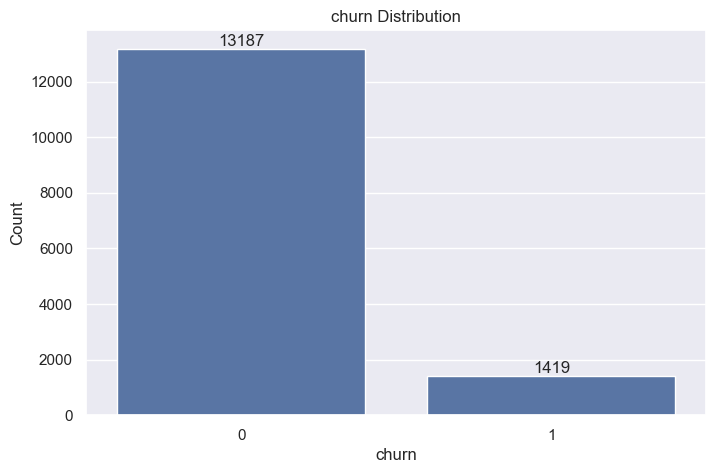

In [17]:
churn = client_df['churn'].value_counts().sort_values(ascending=False)
plt.figure(figsize=(8, 5))
churn = sns.countplot(data=df, x='churn', order=churn.index)

for p in churn.patches:
    churn.annotate(
        f'{int(p.get_height())}',  
        (p.get_x() + p.get_width() / 2, p.get_height()),  
        ha='center',  
        va='bottom'  
    )

plt.title("churn Distribution")
plt.xlabel("churn")
plt.ylabel("Count")
plt.show()

 This churn distribution shows an imbalance distribution to our target feature which would be a potential issue. However, i would apply oversampling techniques later on

In [20]:
def plot_stacked_bars(dataframe, title_, size_=(18, 10), rot_=0, legend_="upper right"):
    """
    Plot stacked bars with annotations
    """
    ax = dataframe.plot(
        kind="bar",
        stacked=True,
        figsize=size_,
        rot=rot_,
        title=title_
    )

    # Annotate bars
    annotate_stacked_bars(ax, textsize=14)
    # Rename legend
    plt.legend(["Retention", "Churn"], loc=legend_)
    # Labels
    plt.ylabel("Company base (%)")
    plt.show()

def annotate_stacked_bars(ax, pad=0.99, colour="white", textsize=13):
    """
    Add value annotations to the bars
    """

    # Iterate over the plotted rectanges/bars
    for p in ax.patches:
        
        # Calculate annotation
        value = str(round(p.get_height(),1))
        # If value is 0 do not annotate
        if value == '0.0':
            continue
        ax.annotate(
            value,
            ((p.get_x()+ p.get_width()/2)*pad-0.05, (p.get_y()+p.get_height()/2)*pad),
            color=colour,
            size=textsize
        )

###  churn rate at PowerCo

In [19]:
churn = client_df[['id', 'churn']]
churn.columns = ['Companies', 'churn']
churn_total = churn.groupby(churn['churn']).count()
churn_percentage = churn_total / churn_total.sum() * 100

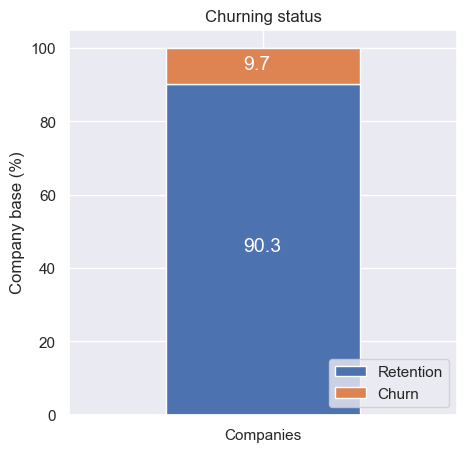

In [21]:
plot_stacked_bars(churn_percentage.transpose(), "Churning status", (5, 5), legend_="lower right")

About 10% of the total customers have churned. I will give them insights to reduce the rate to at least 5% or even less

### Sales Channel

In [28]:
client_df['channel_sales'].value_counts()

channel_sales
foosdfpfkusacimwkcsosbicdxkicaua    6754
MISSING                             3725
lmkebamcaaclubfxadlmueccxoimlema    1843
usilxuppasemubllopkaafesmlibmsdf    1375
ewpakwlliwisiwduibdlfmalxowmwpci     893
sddiedcslfslkckwlfkdpoeeailfpeds      11
epumfxlbckeskwekxbiuasklxalciiuu       3
fixdbufsefwooaasfcxdxadsiekoceaa       2
Name: count, dtype: int64

In [30]:
channel = client_df[['id', 'channel_sales', 'churn']]
channel = channel.groupby([channel['channel_sales'], channel['churn']])['id'].count().unstack(level=1).fillna(0)
channel_churn = (channel.div(channel.sum(axis=1), axis=0) * 100).sort_values(by=[1], ascending=False)

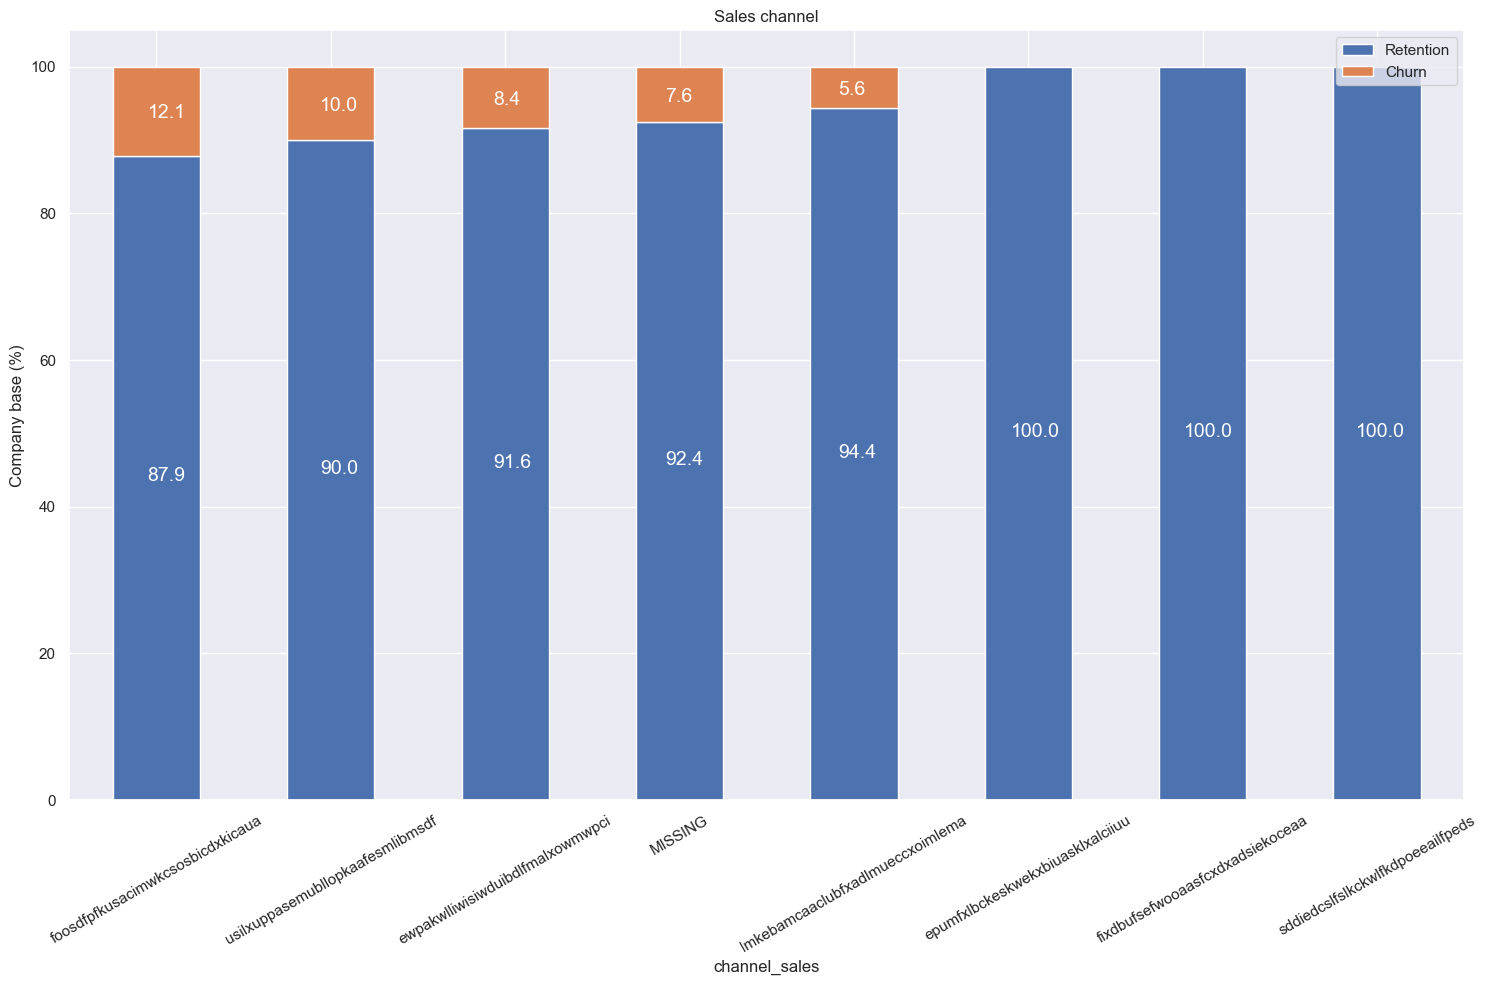

In [31]:
plot_stacked_bars(channel_churn, 'Sales channel', rot_=30)

This is becoming Interesting, the churning customers are distributed over 3 different `channel_sales` with a`MISSING` channel which is yet unknown having a churn rate of 7.6%. I see that 3 `channel_sales` have no churn rate and they also have little instances of 11,3, and 2. i wil drop these `channel_sales` later as my priority is churn rate 

### Consumption

Let me see the distribution of the consumption in the last year and month. Since the consumption data is univariate, i will use histograms to visualize their distribution.

In [32]:
consumption = client_df[['id', 'cons_12m', 'cons_gas_12m', 'cons_last_month', 'imp_cons', 'has_gas', 'churn']]

In [33]:
def plot_distribution(dataframe, column, ax, bins_=50):
    """
    Plot variable distribution in a stacked histogram of churned or retained company
    """
    # Create a temporal dataframe with the data to be plot
    temp = pd.DataFrame({"Retention": dataframe[dataframe["churn"]==0][column],
    "Churn":dataframe[dataframe["churn"]==1][column]})
    # Plot the histogram
    temp[["Retention","Churn"]].plot(kind='hist', bins=bins_, ax=ax, stacked=True)
    # X-axis label
    ax.set_xlabel(column)
    # Change the x-axis to plain style
    ax.ticklabel_format(style='plain', axis='x')

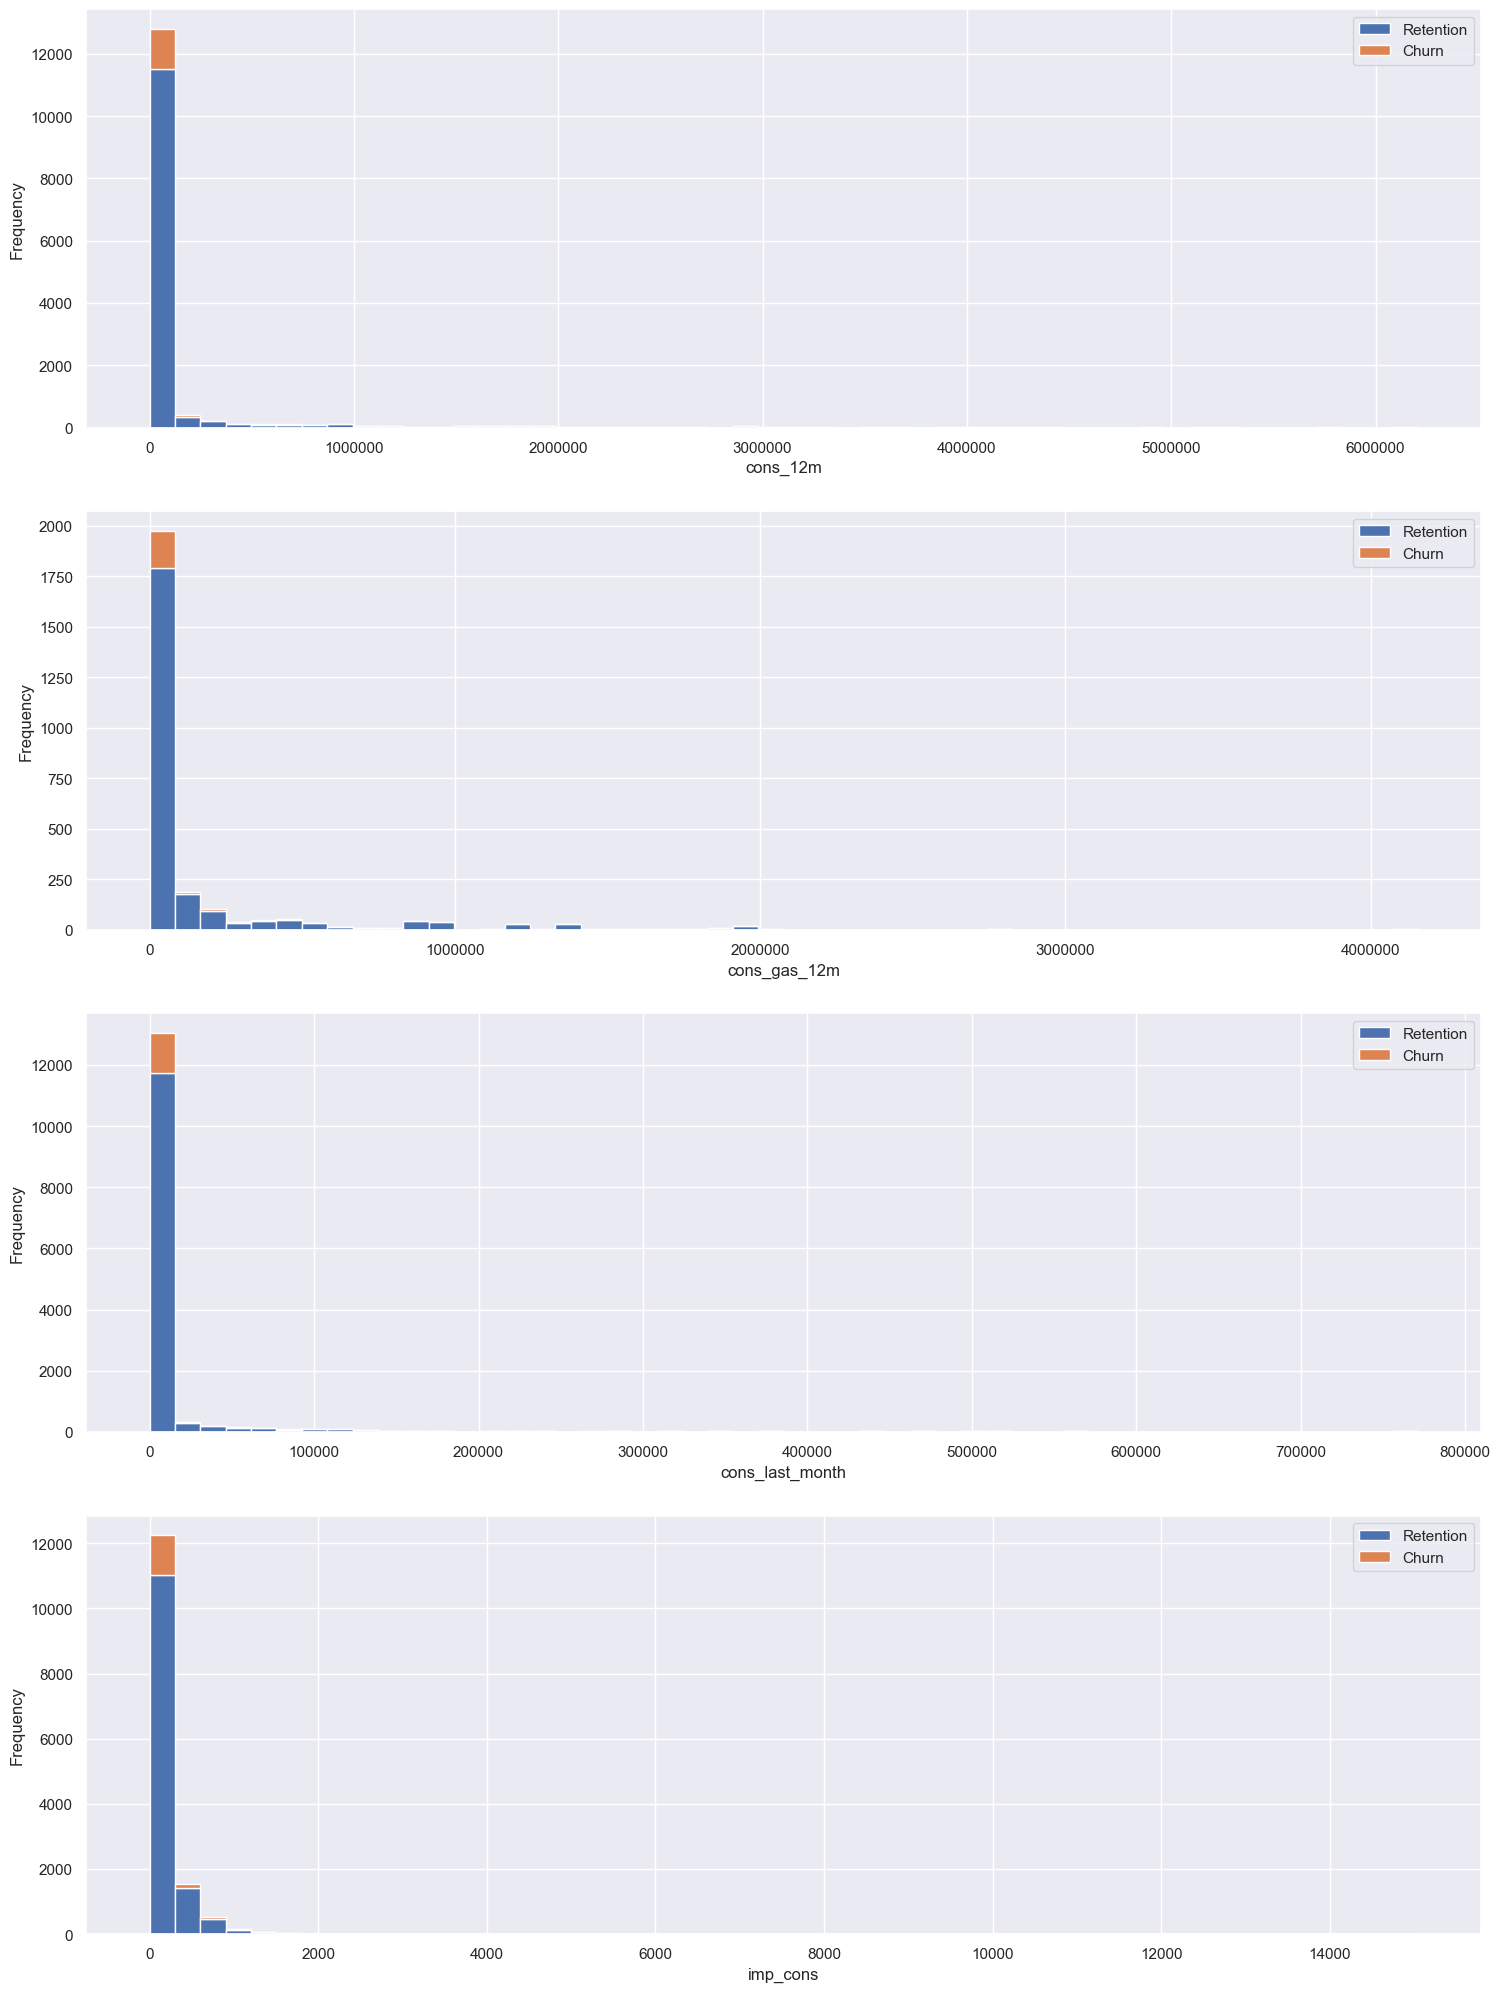

In [122]:
fig, axs = plt.subplots(nrows=4, figsize=(18, 25))

plot_distribution(consumption, 'cons_12m', axs[0])
plot_distribution(consumption[consumption['has_gas'] == 't'], 'cons_gas_12m', axs[1])
plot_distribution(consumption, 'cons_last_month', axs[2])
plot_distribution(consumption, 'imp_cons', axs[3])

Clearly, the consumption data is highly positively skewed, presenting a very long right-tail towards the higher values of the distribution. The values on the higher and lower end of the distribution are likely to be outliers. We can use a standard plot to visualise the outliers in more detail. A boxplot is a standardized way of displaying the distribution based on a five number summary:
- Minimum
- First quartile (Q1)
- Median
- Third quartile (Q3)
- Maximum

It can reveal outliers and what their values are. It can also tell us if our data is symmetrical, how tightly our data is grouped and if/how our data is skewed.

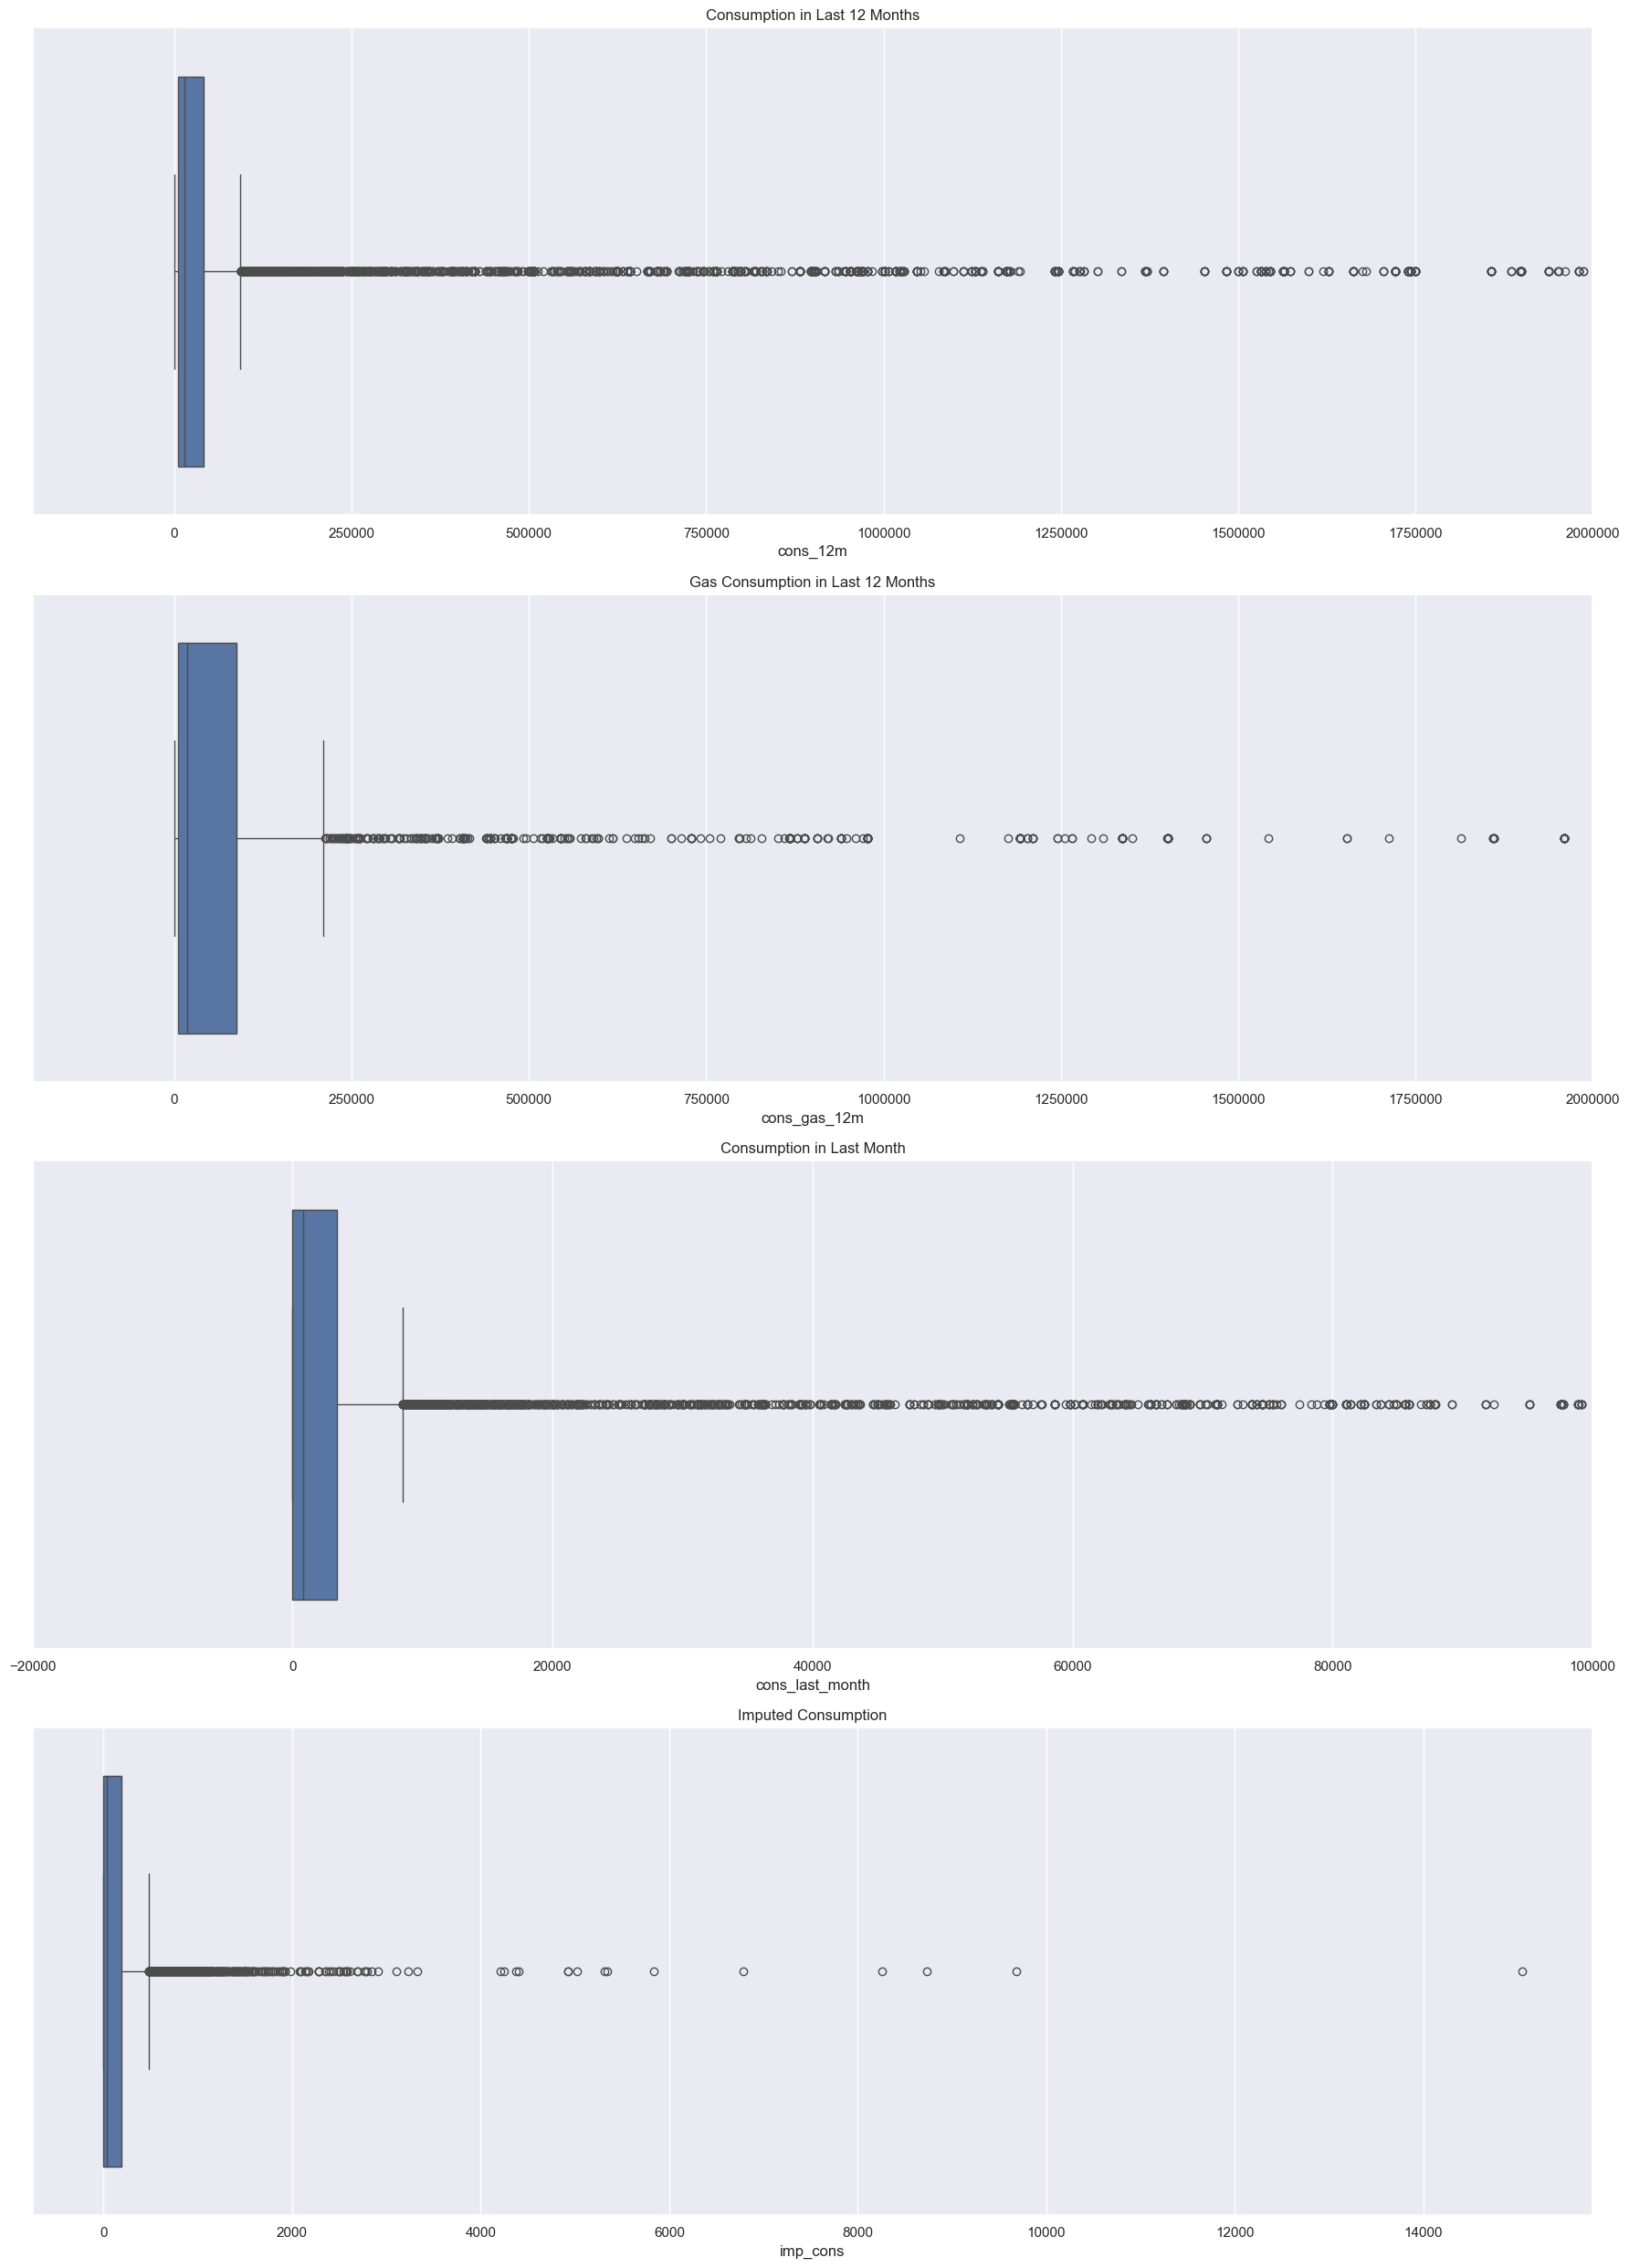

In [37]:


# Create 4 subplots stacked vertically
fig, axs = plt.subplots(nrows=4, figsize=(18, 25))

# Plot boxplots
sns.boxplot(x=consumption["cons_12m"], ax=axs[0])
sns.boxplot(x=consumption[consumption["has_gas"] == "t"]["cons_gas_12m"], ax=axs[1])
sns.boxplot(x=consumption["cons_last_month"], ax=axs[2])
sns.boxplot(x=consumption["imp_cons"], ax=axs[3])

# Remove scientific notation and set x-axis limits
axs[0].ticklabel_format(style='plain', axis='x')
axs[1].ticklabel_format(style='plain', axis='x')
axs[2].ticklabel_format(style='plain', axis='x')
axs[3].ticklabel_format(style='plain', axis='x')

# Set custom x-limits
axs[0].set_xlim(-200000, 2000000)
axs[1].set_xlim(-200000, 2000000)
axs[2].set_xlim(-20000, 100000)

# Optional: Add titles for clarity
axs[0].set_title("Consumption in Last 12 Months")
axs[1].set_title("Gas Consumption in Last 12 Months")
axs[2].set_title("Consumption in Last Month")
axs[3].set_title("Imputed Consumption")

# Display all plots
plt.tight_layout()
plt.show()


I will deal with skewness and outliers during feature engineering Phase or i can decide to build my model with or without outliers. There is no 100 percent correct way of doing this

###  Forecast

In [39]:
forecast = client_df[
    ["id", "forecast_cons_12m",
    "forecast_cons_year","forecast_discount_energy","forecast_meter_rent_12m",
    "forecast_price_energy_off_peak","forecast_price_energy_peak",
    "forecast_price_pow_off_peak","churn"
    ]
]

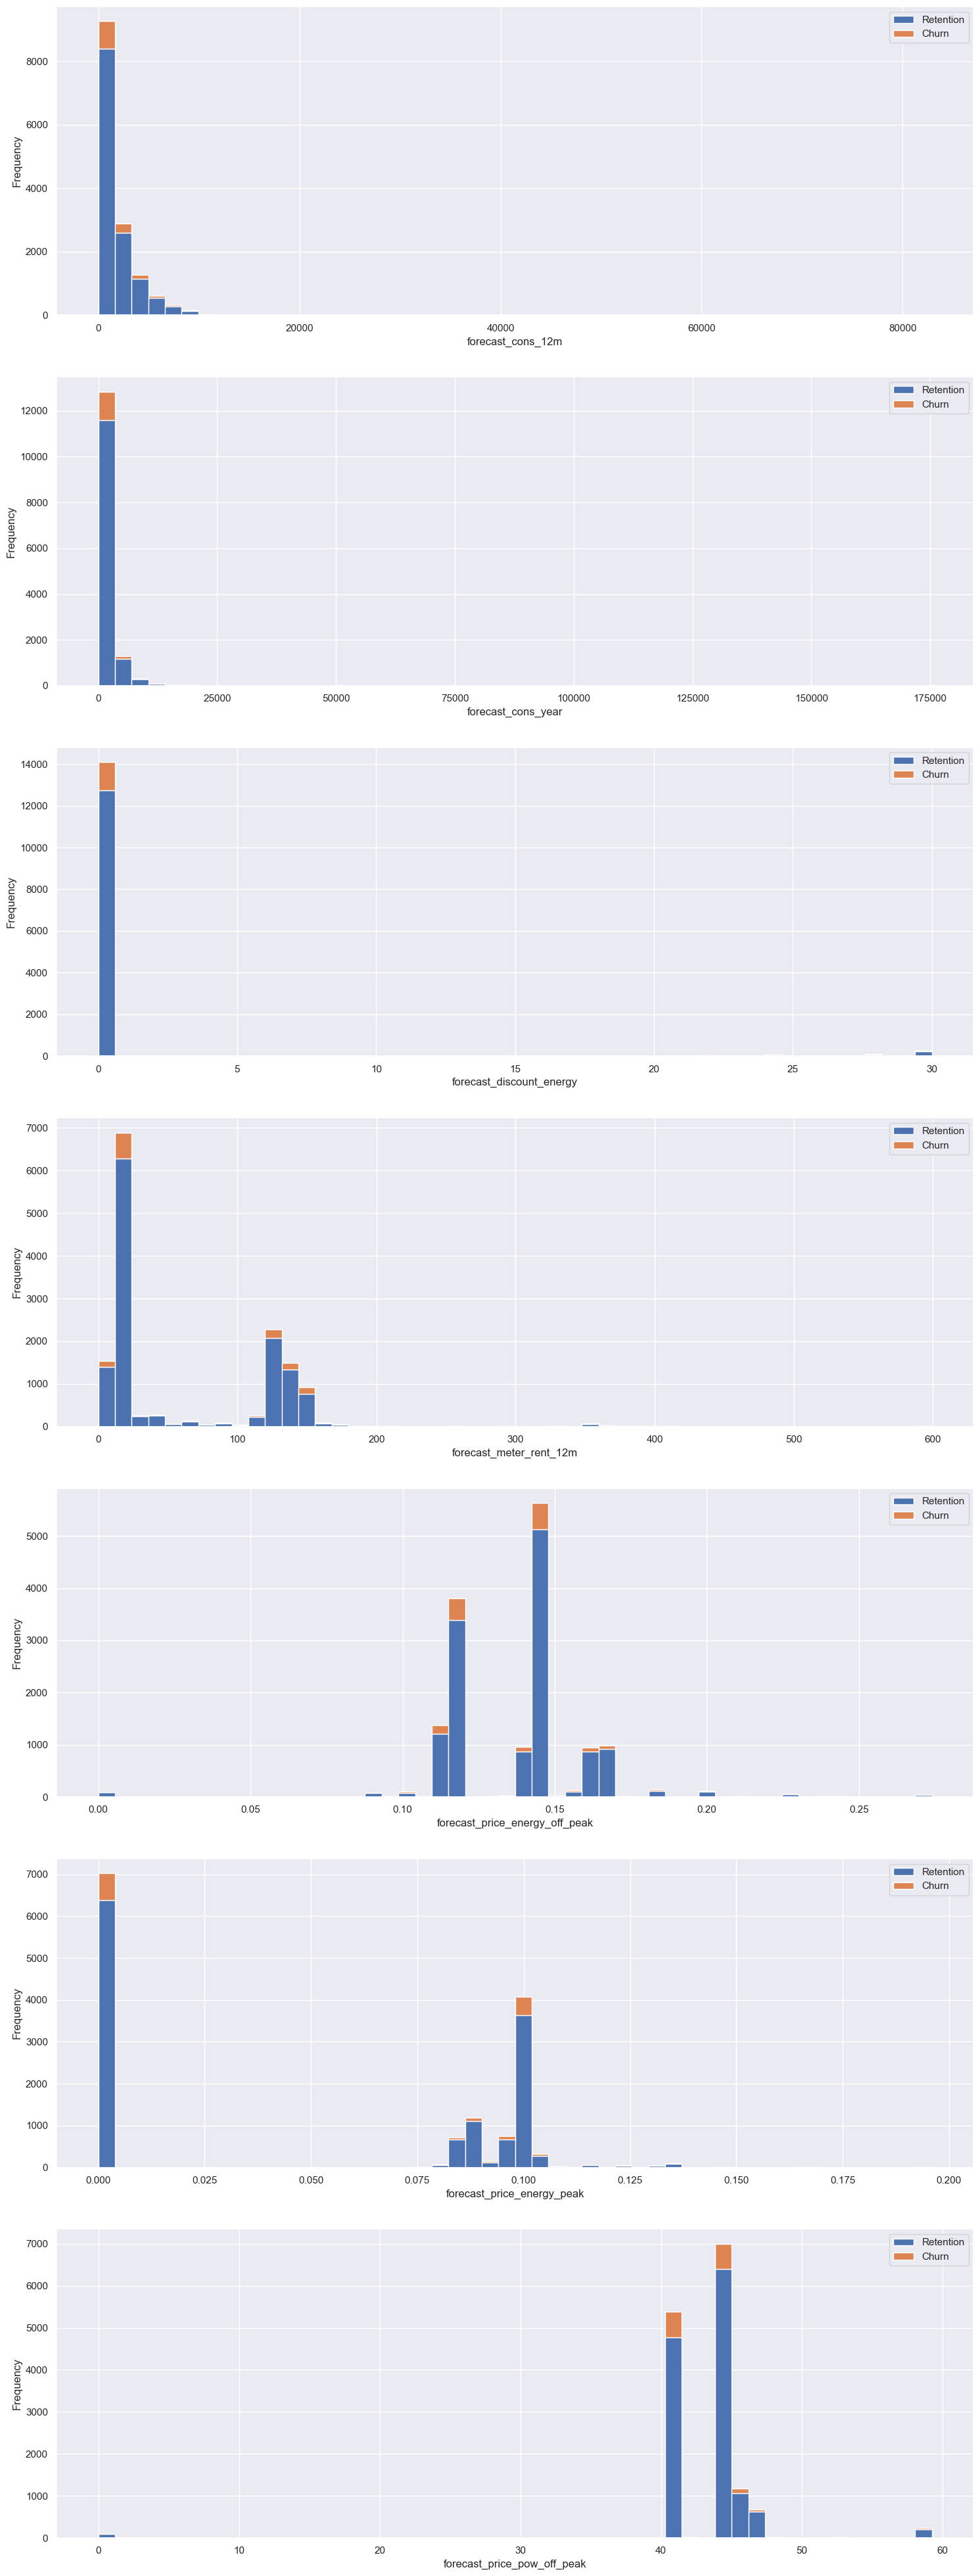

In [123]:
fig, axs = plt.subplots(nrows=7, figsize=(18,50))

# Plot histogram
plot_distribution(df, "forecast_cons_12m", axs[0])
plot_distribution(df, "forecast_cons_year", axs[1])
plot_distribution(df, "forecast_discount_energy", axs[2])
plot_distribution(df, "forecast_meter_rent_12m", axs[3])
plot_distribution(df, "forecast_price_energy_off_peak", axs[4])
plot_distribution(df, "forecast_price_energy_peak", axs[5])
plot_distribution(df, "forecast_price_pow_off_peak", axs[6])

Similarly to the consumption plots, we can observe that a lot of the variables are highly positively skewed

### Contract Type

In [43]:
contract_type = client_df[['id', 'has_gas', 'churn']]
contract = contract_type.groupby([contract_type['churn'], contract_type['has_gas']])['id'].count().unstack(level=0)
contract_percentage = (contract.div(contract.sum(axis=1), axis=0) * 100).sort_values(by=[1], ascending=False)

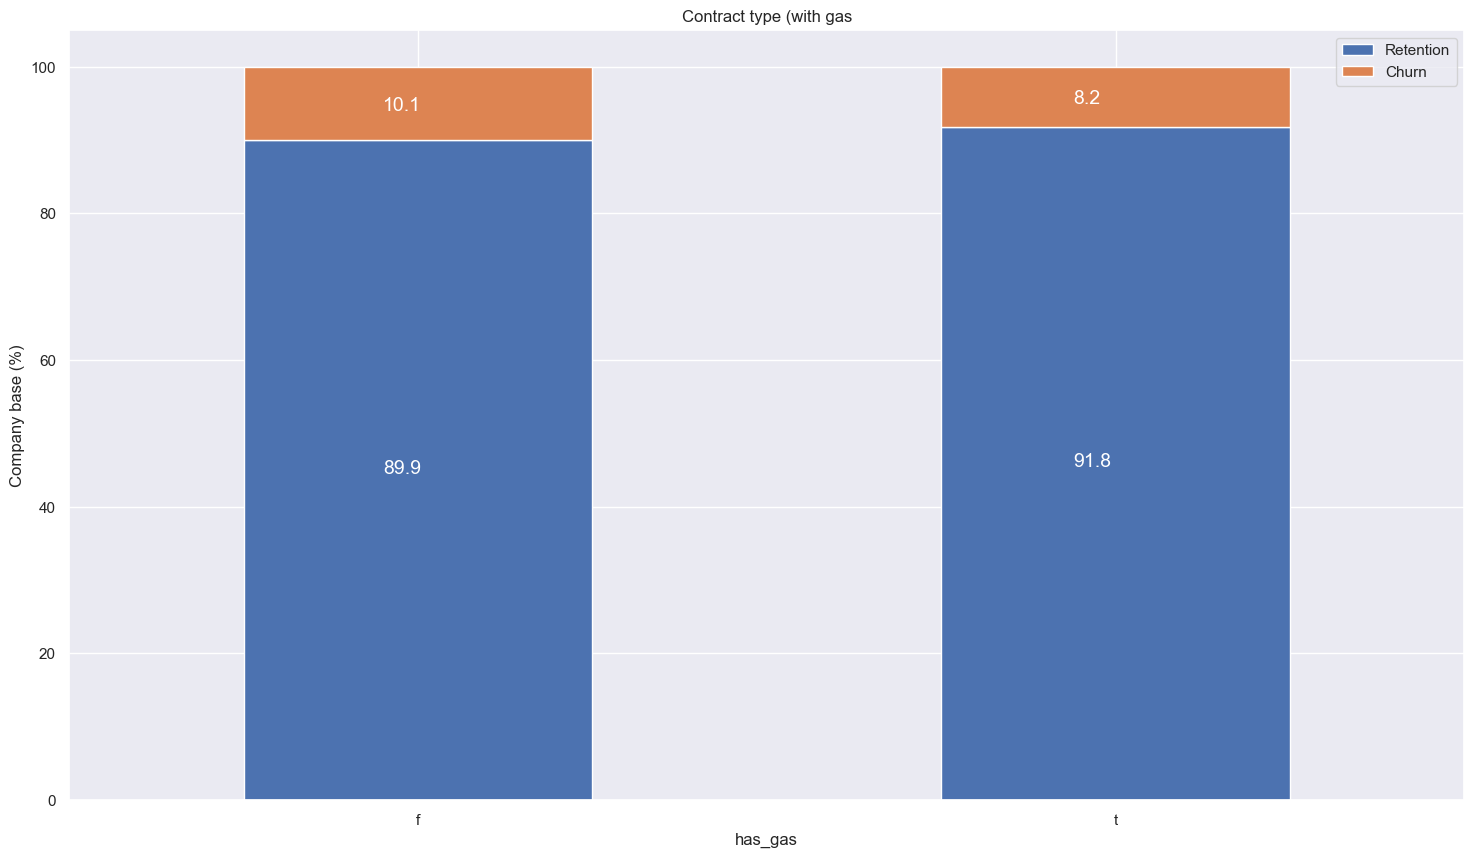

In [44]:
plot_stacked_bars(contract_percentage, 'Contract type (with gas')

### Margins

In [46]:
margin = client_df[['id', 'margin_gross_pow_ele', 'margin_net_pow_ele', 'net_margin']]

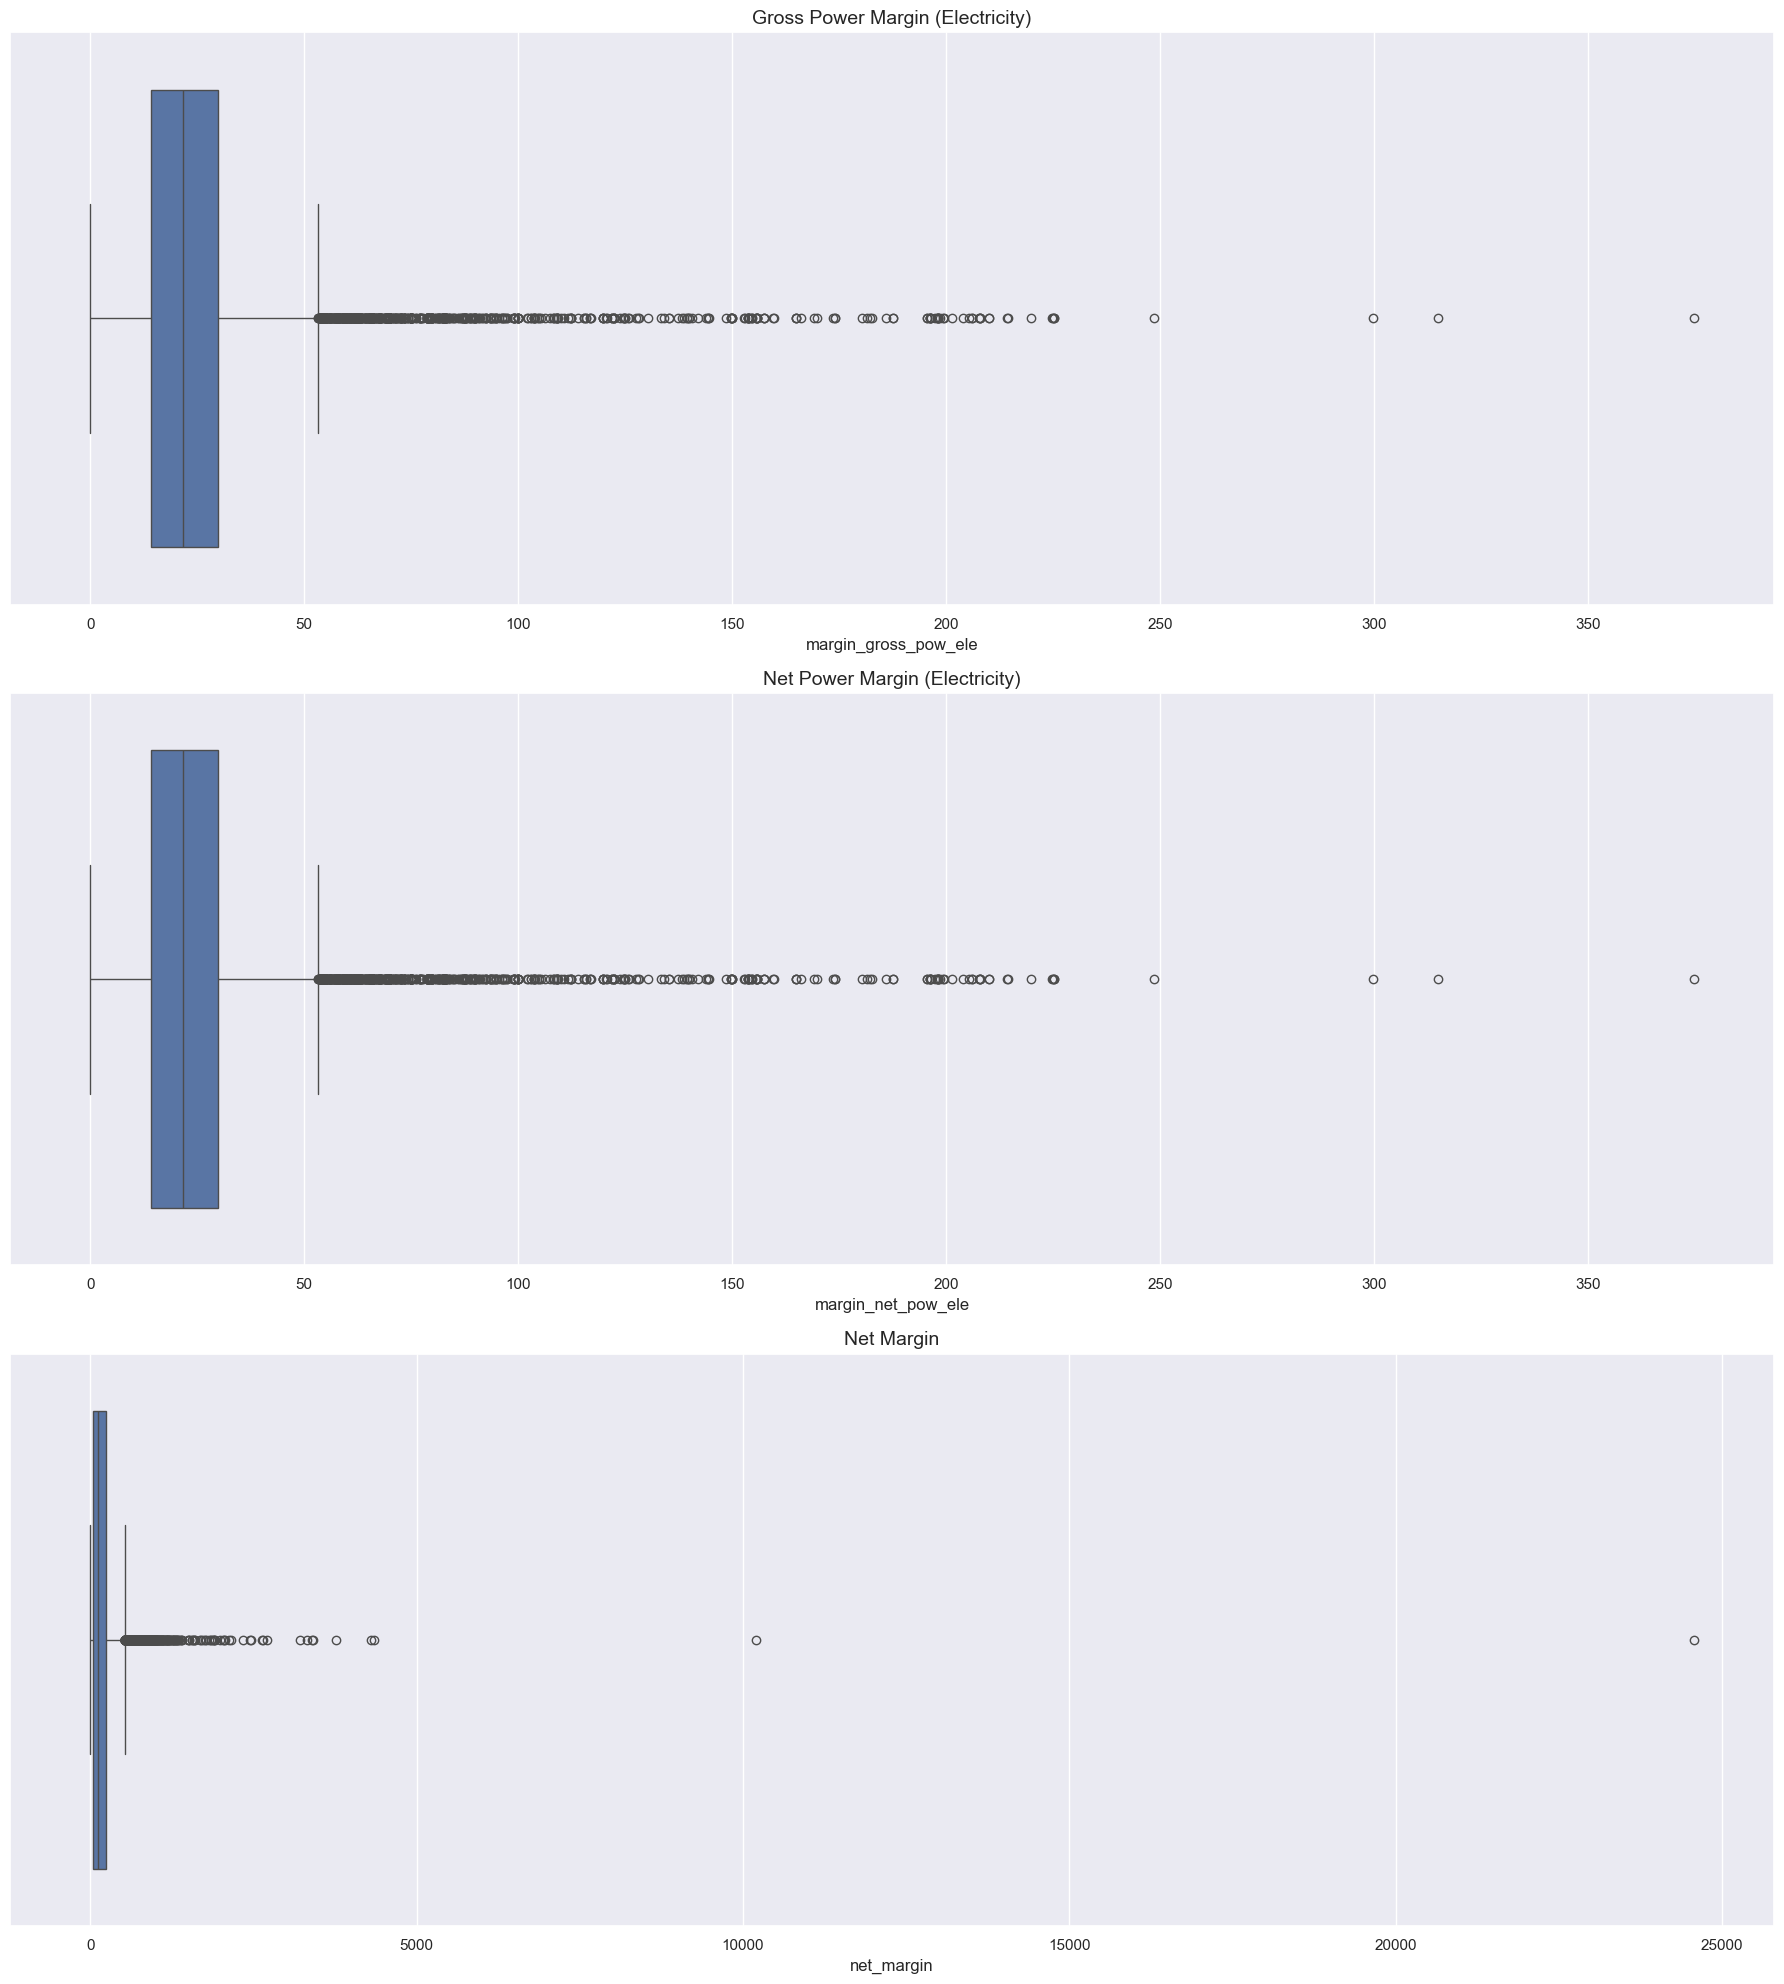

In [48]:

# Create 3 vertically stacked subplots
fig, axs = plt.subplots(nrows=3, figsize=(18, 20))

# Plot each boxplot
sns.boxplot(x=margin["margin_gross_pow_ele"], ax=axs[0])
sns.boxplot(x=margin["margin_net_pow_ele"], ax=axs[1])
sns.boxplot(x=margin["net_margin"], ax=axs[2])

# Set axis formatting and titles
titles = [
    "Gross Power Margin (Electricity)",
    "Net Power Margin (Electricity)",
    "Net Margin"
]

for ax, title in zip(axs, titles):
    ax.ticklabel_format(style='plain', axis='x')  # Remove scientific notation
    ax.set_title(title, fontsize=14)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


we can also notice some outliers 

### Subscribed power

In [50]:
power = client_df[['id', 'pow_max', 'churn']]

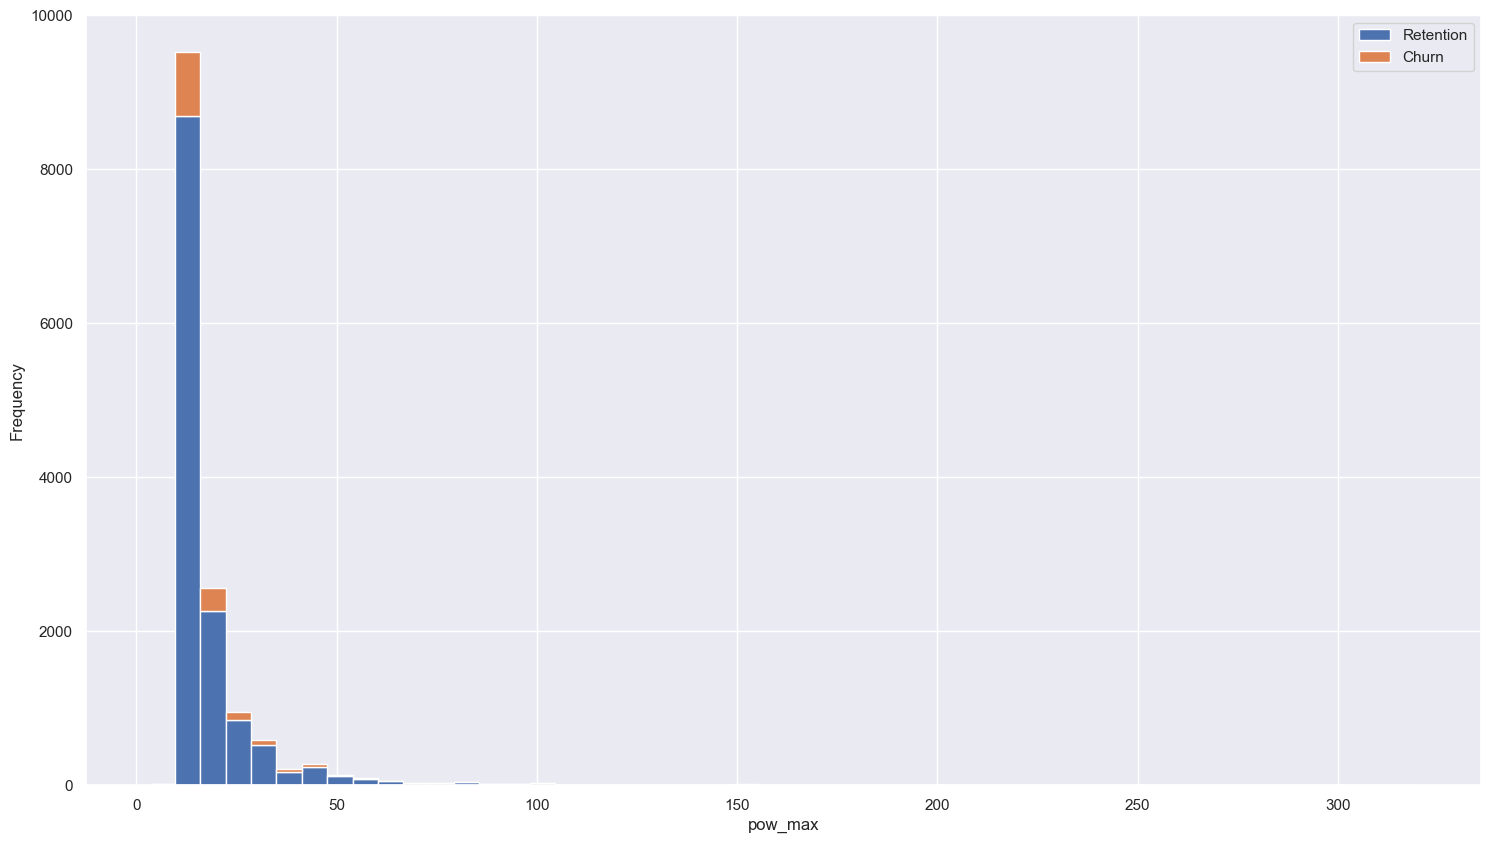

In [51]:
fig, axs = plt.subplots(nrows=1, figsize=(18, 10))
plot_distribution(power, 'pow_max', axs)

### Other columns

In [52]:
others = client_df[['id', 'nb_prod_act', 'num_years_antig', 'origin_up', 'churn']]
products = others.groupby([others["nb_prod_act"],others["churn"]])["id"].count().unstack(level=1)
products_percentage = (products.div(products.sum(axis=1), axis=0)*100).sort_values(by=[1], ascending=False)

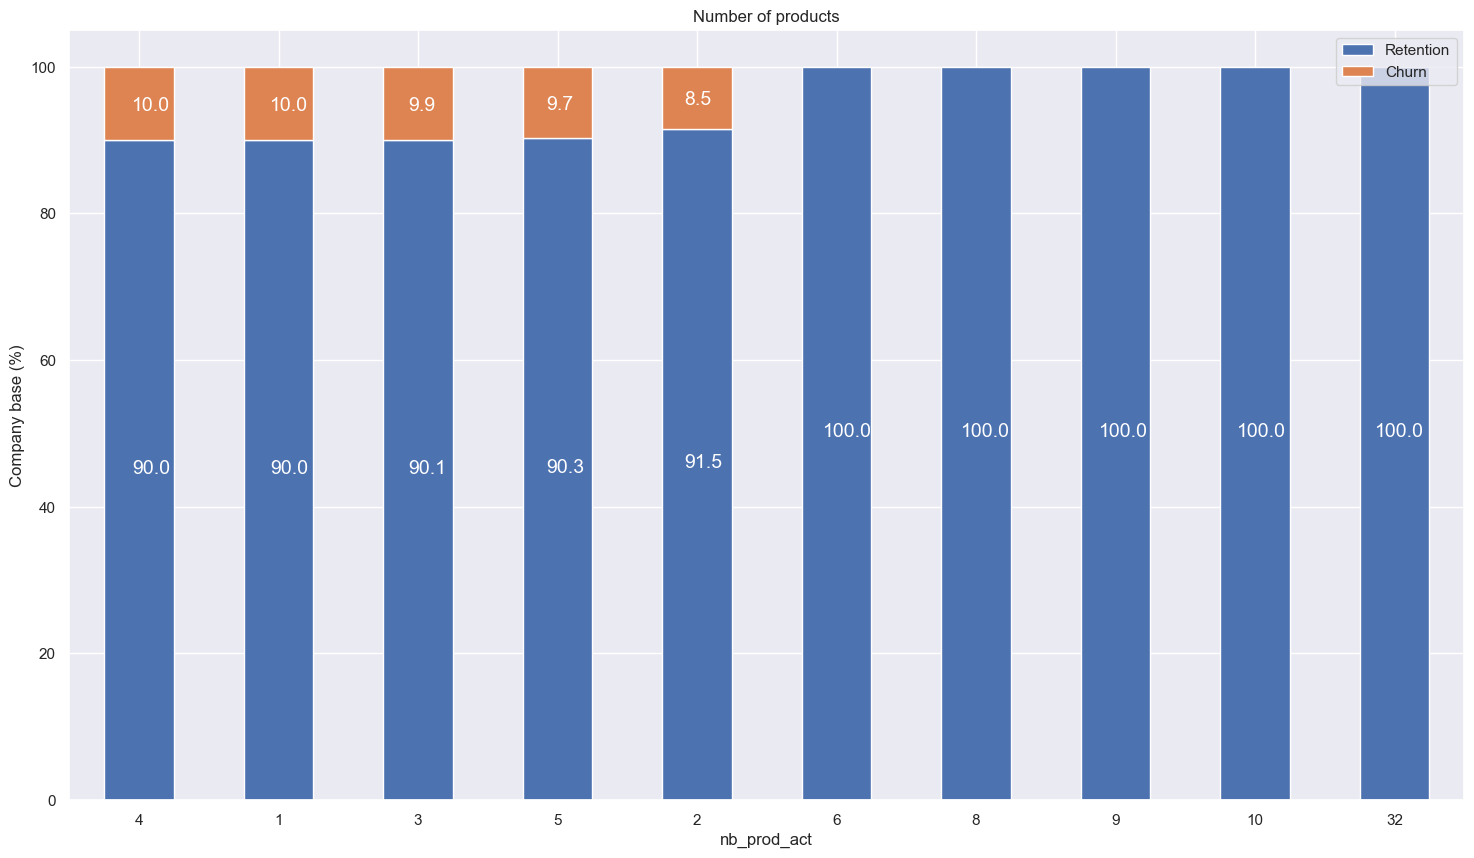

In [53]:
plot_stacked_bars(products_percentage, "Number of products")

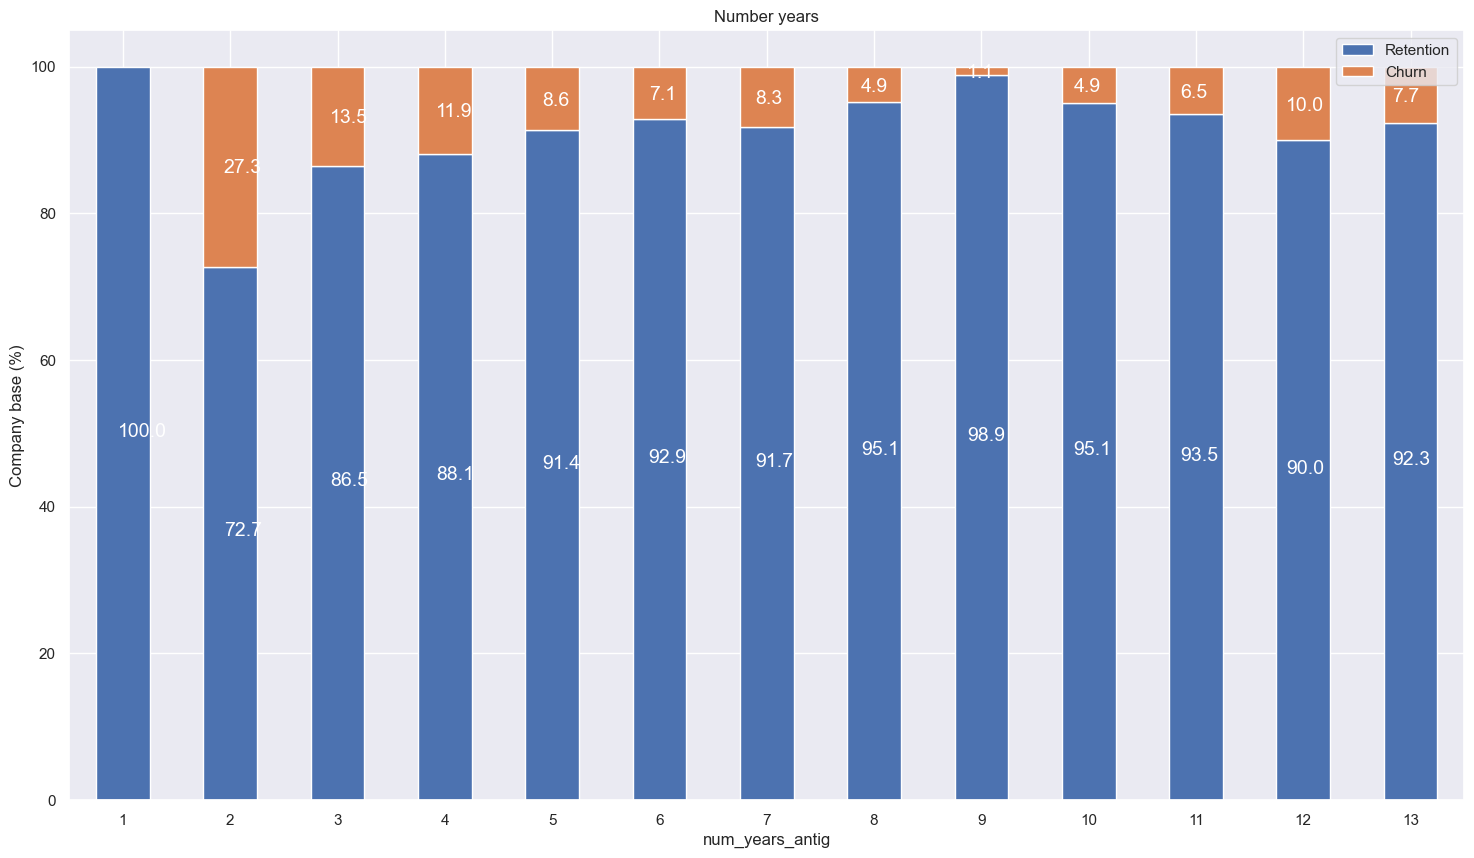

In [54]:
years_antig = others.groupby([others["num_years_antig"],others["churn"]])["id"].count().unstack(level=1)
years_antig_percentage = (years_antig.div(years_antig.sum(axis=1), axis=0)*100)
plot_stacked_bars(years_antig_percentage, "Number years")

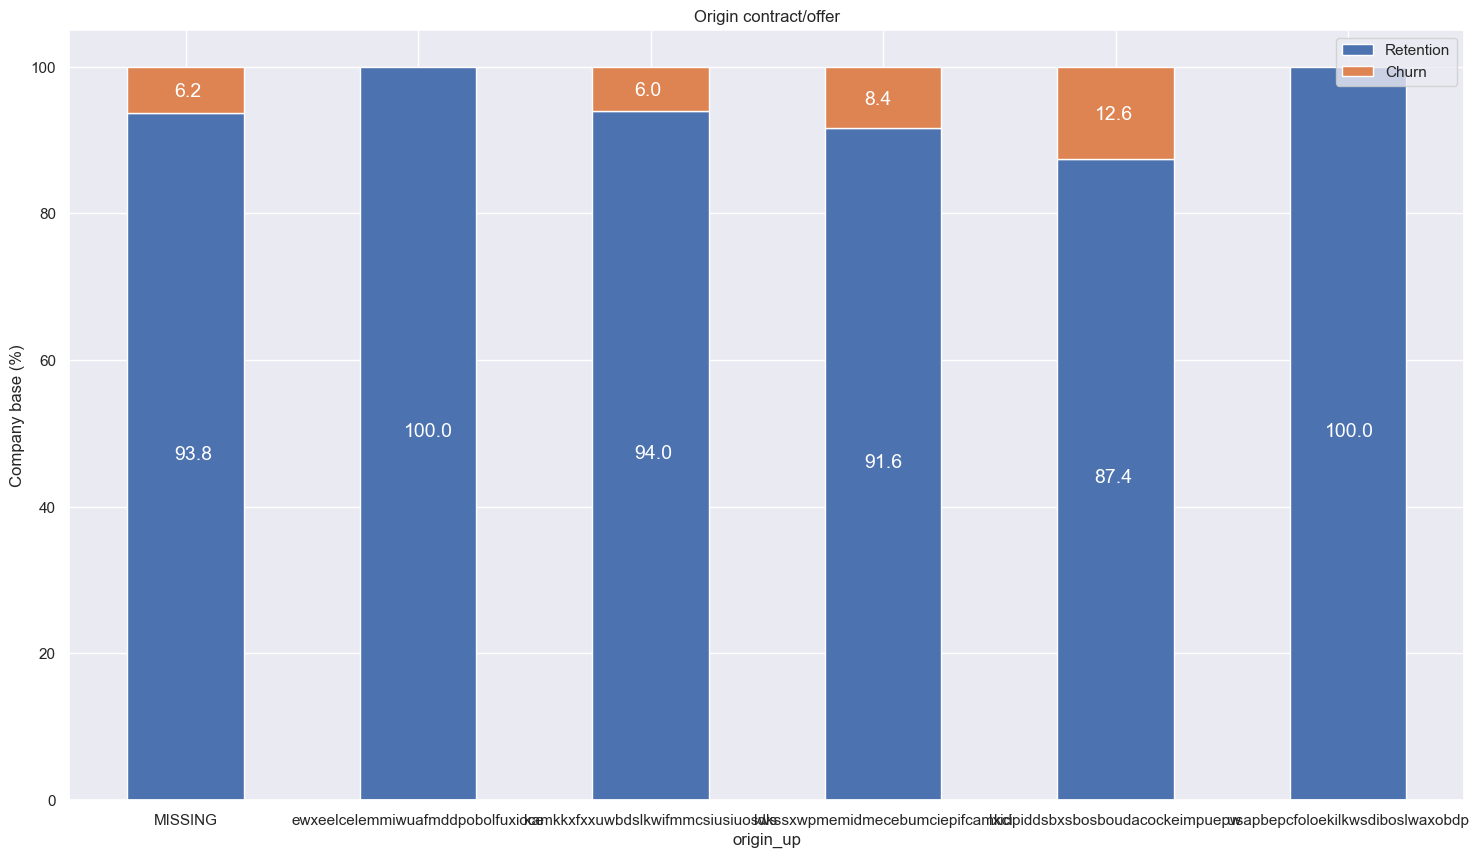

In [55]:
origin = others.groupby([others["origin_up"],others["churn"]])["id"].count().unstack(level=1)
origin_percentage = (origin.div(origin.sum(axis=1), axis=0)*100)
plot_stacked_bars(origin_percentage, "Origin contract/offer")

## Overall Outliers Check

In [135]:
client_df.head(2)

id                     channel_sales  \
0  24011ae4ebbe3035111d65fa7c15bc57  foosdfpfkusacimwkcsosbicdxkicaua   
1  d29c2c54acc38ff3c0614d0a653813dd                           MISSING   

   cons_12m  cons_gas_12m  cons_last_month  date_activ    date_end  \
0         0         54946                0  2013-06-15  2016-06-15   
1      4660             0                0  2009-08-21  2016-08-30   

  date_modif_prod date_renewal  forecast_cons_12m  forecast_cons_year  \
0      2015-11-01   2015-06-23               0.00                   0   
1      2009-08-21   2015-08-31             189.95                   0   

   forecast_discount_energy  forecast_meter_rent_12m  \
0                       0.0                     1.78   
1                       0.0                    16.27   

   forecast_price_energy_off_peak  forecast_price_energy_peak  \
0                        0.114481                    0.098142   
1                        0.145711                    0.000000   

   forecast_price_pow_off_peak has_gas  imp_cons  margin_gross_pow_ele  \
0                    40.606701       t       0.0                 25.44   
1                    44.311378       f       0.0                 16.38   

   margin_net_pow_ele  nb_prod_act  net_margin  num_years_antig  \
0               25.44            2      678.99                3   
1               16.38            1       18.89                6   

                          origin_up  pow_max  churn  
0  lxidpiddsbxsbosboudacockeimpuepw   43.648      1  
1  kamkkxfxxuwbdslkwifmmcsiusiuosws   13.800      0

In [127]:
cols = client_df[
    [ "forecast_cons_12m",
    "forecast_cons_year","forecast_discount_energy","forecast_meter_rent_12m",
    "forecast_price_energy_off_peak","forecast_price_energy_peak",
    "forecast_price_pow_off_peak",'cons_12m', 'cons_gas_12m', 'cons_last_month', 'imp_cons','margin_gross_pow_ele',	'margin_net_pow_ele',
     'nb_prod_act',	'net_margin','num_years_antig'	
    ]
]

In [130]:
 #Calculate Q1 and Q3

Q1 =cols.quantile(0.25)
Q3 =cols.quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = pd.DataFrame()

for column in cols:
    outlier_mask = (cols[column] < lower_bound[column]) | (cols[column] > upper_bound[column])
    outliers = pd.concat([outliers, cols[column][outlier_mask]], axis=1)

In [131]:
 outliers.count()

forecast_cons_12m                 1054
forecast_cons_year                1298
forecast_discount_energy           512
forecast_meter_rent_12m            152
forecast_price_energy_off_peak     371
forecast_price_energy_peak           0
forecast_price_pow_off_peak        345
cons_12m                          2084
cons_gas_12m                      2612
cons_last_month                   2051
imp_cons                          1215
margin_gross_pow_ele               660
margin_net_pow_ele                 660
nb_prod_act                       3175
net_margin                        1022
num_years_antig                    389
dtype: int64

In [132]:
len(outliers)

6389

In [133]:
len(client_df)

14606

In [134]:
14606 * 0.05  #the len of the outliers is greater than 5% of the data

730.3000000000001

I can realistically remove only about 1% of the outliers, not all of them. Alternatively, I may choose to initially include the outliers and observe how they impact the model’s performance.

Following the rule of thumb, it's generally not appropriate to eliminate all data points containing outliers, as this could lead to the loss of valuable information and significantly reduce the dataset size.

# EDA on price data

Now, let perform a simple visualization to the price data

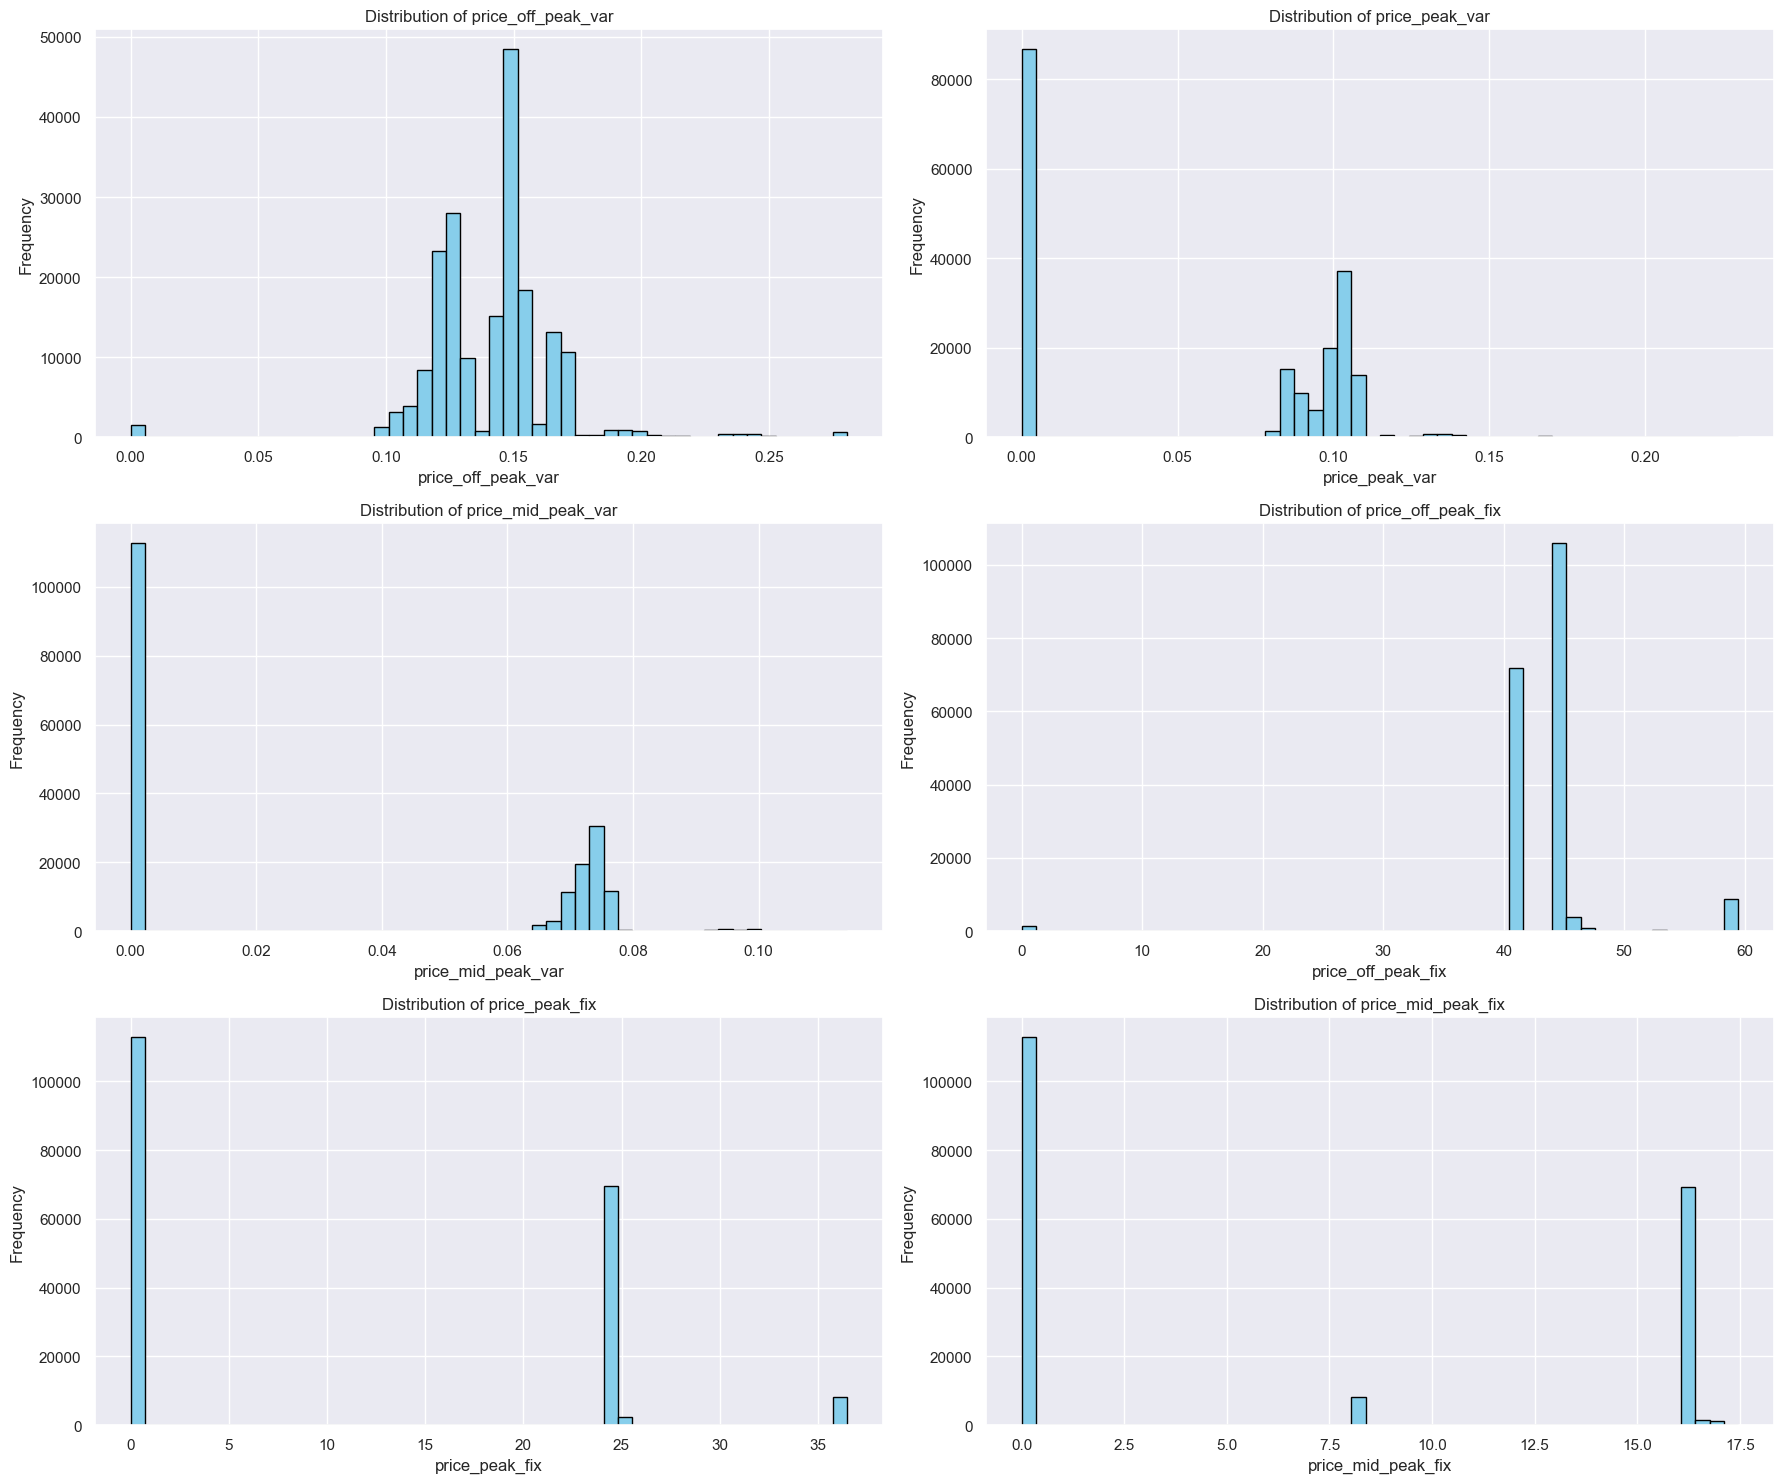

In [140]:


def plot_distribution(dataframe, column, ax, bins_=50):
    """
    Plot the distribution of a single variable in a histogram.
    """
    ax.hist(dataframe[column].dropna(), bins=bins_, color='skyblue', edgecolor='black')
    ax.set_title(f'Distribution of {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Frequency')
    ax.ticklabel_format(style='plain', axis='x')

# Select relevant price columns
price = price_df[[
    "price_off_peak_var", "price_peak_var", "price_mid_peak_var",
    "price_off_peak_fix", "price_peak_fix", "price_mid_peak_fix"
]]

# Create subplots
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(18, 15))
axs = axs.flatten()

# Plot each distribution
columns = price.columns
for i, col in enumerate(columns):
    plot_distribution(price, col, axs[i])

plt.tight_layout()
plt.show()


# Task 3: Feature Engineering & Modelling

Now moving into the feature engineering phase of the project.

My team lead has just shared a partially cleaned dataset for me to work with. I’ll begin by loading this new dataset and performing the required feature engineering tasks.

One of the key tasks is to create new features that capture the difference between off-peak prices in December and January of the preceding year. I’ll also explore and engineer additional meaningful features that could enhance model performance.

In [196]:
df = pd.read_csv(r'/Users/sot/Downloads/clean_data_after_eda.csv')

In [197]:
df.head(2)

id                     channel_sales  \
0  24011ae4ebbe3035111d65fa7c15bc57  foosdfpfkusacimwkcsosbicdxkicaua   
1  d29c2c54acc38ff3c0614d0a653813dd                           MISSING   

   cons_12m  cons_gas_12m  cons_last_month  date_activ    date_end  \
0         0         54946                0  2013-06-15  2016-06-15   
1      4660             0                0  2009-08-21  2016-08-30   

  date_modif_prod date_renewal  forecast_cons_12m  forecast_cons_year  \
0      2015-11-01   2015-06-23               0.00                   0   
1      2009-08-21   2015-08-31             189.95                   0   

   forecast_discount_energy  forecast_meter_rent_12m  \
0                       0.0                     1.78   
1                       0.0                    16.27   

   forecast_price_energy_off_peak  forecast_price_energy_peak  \
0                        0.114481                    0.098142   
1                        0.145711                    0.000000   

   forecast_price_pow_off_peak has_gas  imp_cons  margin_gross_pow_ele  \
0                    40.606701       t       0.0                 25.44   
1                    44.311378       f       0.0                 16.38   

   margin_net_pow_ele  nb_prod_act  net_margin  num_years_antig  \
0               25.44            2      678.99                3   
1               16.38            1       18.89                6   

                          origin_up  pow_max  var_year_price_off_peak_var  \
0  lxidpiddsbxsbosboudacockeimpuepw   43.648                     0.000061   
1  kamkkxfxxuwbdslkwifmmcsiusiuosws   13.800                     0.000005   

   var_year_price_peak_var  var_year_price_mid_peak_var  \
0                 0.000026                      0.00044   
1                 0.000609                      0.00000   

   var_year_price_off_peak_fix  var_year_price_peak_fix  \
0                     1.102785                49.550703   
1                     0.006465                 0.000000   

   var_year_price_mid_peak_fix  var_year_price_off_peak  var_year_price_peak  \
0                    22.022535                 1.102846            49.550729   
1                     0.000000                 0.006470             0.000609   

   var_year_price_mid_peak  var_6m_price_off_peak_var  var_6m_price_peak_var  \
0                22.022975                   0.000131               0.000041   
1                 0.000000                   0.000003               0.001218   

   var_6m_price_mid_peak_var  var_6m_price_off_peak_fix  \
0                   0.000908                   2.086294   
1                   0.000000                   0.009482   

   var_6m_price_peak_fix  var_6m_price_mid_peak_fix  var_6m_price_off_peak  \
0              99.530517                  44.235794               2.086425   
1               0.000000                   0.000000               0.009485   

   var_6m_price_peak  var_6m_price_mid_peak  churn  
0          99.530558              44.236702      1  
1           0.001218               0.000000      0

In [257]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 63 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   id                                          14606 non-null  object 
 1   cons_12m                                    14606 non-null  float64
 2   cons_gas_12m                                14606 non-null  float64
 3   cons_last_month                             14606 non-null  float64
 4   forecast_cons_12m                           14606 non-null  float64
 5   forecast_discount_energy                    14606 non-null  float64
 6   forecast_meter_rent_12m                     14606 non-null  float64
 7   forecast_price_energy_off_peak              14606 non-null  float64
 8   forecast_price_energy_peak                  14606 non-null  float64
 9   forecast_price_pow_off_peak                 14606 non-null  float64
 10  has_gas   

Now, I will format all datetime columns in the dataset to ensure they are in the correct datetime data type. This step is crucial for any time-based analysis or feature engineering that follows.

In [199]:
df["date_activ"] = pd.to_datetime(df["date_activ"], format='%Y-%m-%d')
df["date_end"] = pd.to_datetime(df["date_end"], format='%Y-%m-%d')
df["date_modif_prod"] = pd.to_datetime(df["date_modif_prod"], format='%Y-%m-%d')
df["date_renewal"] = pd.to_datetime(df["date_renewal"], format='%Y-%m-%d')

In [200]:
df.head(2)

id                     channel_sales  \
0  24011ae4ebbe3035111d65fa7c15bc57  foosdfpfkusacimwkcsosbicdxkicaua   
1  d29c2c54acc38ff3c0614d0a653813dd                           MISSING   

   cons_12m  cons_gas_12m  cons_last_month date_activ   date_end  \
0         0         54946                0 2013-06-15 2016-06-15   
1      4660             0                0 2009-08-21 2016-08-30   

  date_modif_prod date_renewal  forecast_cons_12m  forecast_cons_year  \
0      2015-11-01   2015-06-23               0.00                   0   
1      2009-08-21   2015-08-31             189.95                   0   

   forecast_discount_energy  forecast_meter_rent_12m  \
0                       0.0                     1.78   
1                       0.0                    16.27   

   forecast_price_energy_off_peak  forecast_price_energy_peak  \
0                        0.114481                    0.098142   
1                        0.145711                    0.000000   

   forecast_price_pow_off_peak has_gas  imp_cons  margin_gross_pow_ele  \
0                    40.606701       t       0.0                 25.44   
1                    44.311378       f       0.0                 16.38   

   margin_net_pow_ele  nb_prod_act  net_margin  num_years_antig  \
0               25.44            2      678.99                3   
1               16.38            1       18.89                6   

                          origin_up  pow_max  var_year_price_off_peak_var  \
0  lxidpiddsbxsbosboudacockeimpuepw   43.648                     0.000061   
1  kamkkxfxxuwbdslkwifmmcsiusiuosws   13.800                     0.000005   

   var_year_price_peak_var  var_year_price_mid_peak_var  \
0                 0.000026                      0.00044   
1                 0.000609                      0.00000   

   var_year_price_off_peak_fix  var_year_price_peak_fix  \
0                     1.102785                49.550703   
1                     0.006465                 0.000000   

   var_year_price_mid_peak_fix  var_year_price_off_peak  var_year_price_peak  \
0                    22.022535                 1.102846            49.550729   
1                     0.000000                 0.006470             0.000609   

   var_year_price_mid_peak  var_6m_price_off_peak_var  var_6m_price_peak_var  \
0                22.022975                   0.000131               0.000041   
1                 0.000000                   0.000003               0.001218   

   var_6m_price_mid_peak_var  var_6m_price_off_peak_fix  \
0                   0.000908                   2.086294   
1                   0.000000                   0.009482   

   var_6m_price_peak_fix  var_6m_price_mid_peak_fix  var_6m_price_off_peak  \
0              99.530517                  44.235794               2.086425   
1               0.000000                   0.000000               0.009485   

   var_6m_price_peak  var_6m_price_mid_peak  churn  
0          99.530558              44.236702      1  
1           0.001218               0.000000      0

In [201]:
price_df["price_date"] = pd.to_datetime(price_df["price_date"], format='%Y-%m-%d')
price_df.head(2)

id price_date  price_off_peak_var  \
0  038af19179925da21a25619c5a24b745 2015-01-01            0.151367   
1  038af19179925da21a25619c5a24b745 2015-02-01            0.151367   

   price_peak_var  price_mid_peak_var  price_off_peak_fix  price_peak_fix  \
0             0.0                 0.0           44.266931             0.0   
1             0.0                 0.0           44.266931             0.0   

   price_mid_peak_fix  
0                 0.0  
1                 0.0

### Difference between off-peak prices in December and preceding January

In [202]:
# Group off-peak prices by companies and month
monthly_price_by_id = price_df.groupby(['id', 'price_date']).agg({'price_off_peak_var': 'mean', 'price_off_peak_fix': 'mean'}).reset_index()

# Get january and december prices
jan_prices = monthly_price_by_id.groupby('id').first().reset_index()
dec_prices = monthly_price_by_id.groupby('id').last().reset_index()

# Calculate the difference
diff = pd.merge(dec_prices.rename(columns={'price_off_peak_var': 'dec_1', 'price_off_peak_fix': 'dec_2'}), jan_prices.drop(columns='price_date'), on='id')
diff['offpeak_diff_dec_january_energy'] = diff['dec_1'] - diff['price_off_peak_var']
diff['offpeak_diff_dec_january_power'] = diff['dec_2'] - diff['price_off_peak_fix']
diff = diff[['id', 'offpeak_diff_dec_january_energy','offpeak_diff_dec_january_power']]
diff.head()

id  offpeak_diff_dec_january_energy  \
0  0002203ffbb812588b632b9e628cc38d                        -0.006192   
1  0004351ebdd665e6ee664792efc4fd13                        -0.004104   
2  0010bcc39e42b3c2131ed2ce55246e3c                         0.050443   
3  0010ee3855fdea87602a5b7aba8e42de                        -0.010018   
4  00114d74e963e47177db89bc70108537                        -0.003994   

   offpeak_diff_dec_january_power  
0                        0.162916  
1                        0.177779  
2                        1.500000  
3                        0.162916  
4                       -0.000001

In [203]:
# Joining the cleaned data i loaded with the peak difference together

df = pd.merge(df, diff, on='id')
df.head()

id                     channel_sales  \
0  24011ae4ebbe3035111d65fa7c15bc57  foosdfpfkusacimwkcsosbicdxkicaua   
1  d29c2c54acc38ff3c0614d0a653813dd                           MISSING   
2  764c75f661154dac3a6c254cd082ea7d  foosdfpfkusacimwkcsosbicdxkicaua   
3  bba03439a292a1e166f80264c16191cb  lmkebamcaaclubfxadlmueccxoimlema   
4  149d57cf92fc41cf94415803a877cb4b                           MISSING   

   cons_12m  cons_gas_12m  cons_last_month date_activ   date_end  \
0         0         54946                0 2013-06-15 2016-06-15   
1      4660             0                0 2009-08-21 2016-08-30   
2       544             0                0 2010-04-16 2016-04-16   
3      1584             0                0 2010-03-30 2016-03-30   
4      4425             0              526 2010-01-13 2016-03-07   

  date_modif_prod date_renewal  forecast_cons_12m  forecast_cons_year  \
0      2015-11-01   2015-06-23               0.00                   0   
1      2009-08-21   2015-08-31             189.95                   0   
2      2010-04-16   2015-04-17              47.96                   0   
3      2010-03-30   2015-03-31             240.04                   0   
4      2010-01-13   2015-03-09             445.75                 526   

   forecast_discount_energy  forecast_meter_rent_12m  \
0                       0.0                     1.78   
1                       0.0                    16.27   
2                       0.0                    38.72   
3                       0.0                    19.83   
4                       0.0                   131.73   

   forecast_price_energy_off_peak  forecast_price_energy_peak  \
0                        0.114481                    0.098142   
1                        0.145711                    0.000000   
2                        0.165794                    0.087899   
3                        0.146694                    0.000000   
4                        0.116900                    0.100015   

   forecast_price_pow_off_peak has_gas  imp_cons  margin_gross_pow_ele  \
0                    40.606701       t      0.00                 25.44   
1                    44.311378       f      0.00                 16.38   
2                    44.311378       f      0.00                 28.60   
3                    44.311378       f      0.00                 30.22   
4                    40.606701       f     52.32                 44.91   

   margin_net_pow_ele  nb_prod_act  net_margin  num_years_antig  \
0               25.44            2      678.99                3   
1               16.38            1       18.89                6   
2               28.60            1        6.60                6   
3               30.22            1       25.46                6   
4               44.91            1       47.98                6   

                          origin_up  pow_max  var_year_price_off_peak_var  \
0  lxidpiddsbxsbosboudacockeimpuepw   43.648                     0.000061   
1  kamkkxfxxuwbdslkwifmmcsiusiuosws   13.800                     0.000005   
2  kamkkxfxxuwbdslkwifmmcsiusiuosws   13.856                     0.000006   
3  kamkkxfxxuwbdslkwifmmcsiusiuosws   13.200                     0.000005   
4  kamkkxfxxuwbdslkwifmmcsiusiuosws   19.800                     0.000015   

   var_year_price_peak_var  var_year_price_mid_peak_var  \
0             2.627605e-05                     0.000440   
1             6.089453e-04                     0.000000   
2             2.558511e-07                     0.000000   
3             0.000000e+00                     0.000000   
4             3.552481e-06                     0.000003   

   var_year_price_off_peak_fix  var_year_price_peak_fix  \
0                     1.102785                49.550703   
1                     0.006465                 0.000000   
2                     0.007662                 0.000000   
3                     0.006465                 0.000000   
4                     0.005429                 0.001954  


## Average price changes across periods

calculating the average price changes across individual periods, instead of the entire year.

In [204]:
mean_prices = price_df.groupby(['id']).agg({
    'price_off_peak_var': 'mean', 
    'price_peak_var': 'mean', 
    'price_mid_peak_var': 'mean',
    'price_off_peak_fix': 'mean',
    'price_peak_fix': 'mean',
    'price_mid_peak_fix': 'mean'    
}).reset_index()

In [205]:
mean_prices.head()

id  price_off_peak_var  price_peak_var  \
0  0002203ffbb812588b632b9e628cc38d            0.124338        0.103794   
1  0004351ebdd665e6ee664792efc4fd13            0.146426        0.000000   
2  0010bcc39e42b3c2131ed2ce55246e3c            0.181558        0.000000   
3  0010ee3855fdea87602a5b7aba8e42de            0.118757        0.098292   
4  00114d74e963e47177db89bc70108537            0.147926        0.000000   

   price_mid_peak_var  price_off_peak_fix  price_peak_fix  price_mid_peak_fix  
0            0.073160           40.701732       24.421038           16.280694  
1            0.000000           44.385450        0.000000            0.000000  
2            0.000000           45.319710        0.000000            0.000000  
3            0.069032           40.647427       24.388455           16.258971  
4            0.000000           44.266930        0.000000            0.000000

In [206]:
# Calculate the mean difference between consecutive periods
mean_prices['off_peak_peak_var_mean_diff'] = mean_prices['price_off_peak_var'] - mean_prices['price_peak_var']
mean_prices['peak_mid_peak_var_mean_diff'] = mean_prices['price_peak_var'] - mean_prices['price_mid_peak_var']
mean_prices['off_peak_mid_peak_var_mean_diff'] = mean_prices['price_off_peak_var'] - mean_prices['price_mid_peak_var']
mean_prices['off_peak_peak_fix_mean_diff'] = mean_prices['price_off_peak_fix'] - mean_prices['price_peak_fix']
mean_prices['peak_mid_peak_fix_mean_diff'] = mean_prices['price_peak_fix'] - mean_prices['price_mid_peak_fix']
mean_prices['off_peak_mid_peak_fix_mean_diff'] = mean_prices['price_off_peak_fix'] - mean_prices['price_mid_peak_fix']

In [207]:
columns = [
    'id', 
    'off_peak_peak_var_mean_diff',
    'peak_mid_peak_var_mean_diff', 
    'off_peak_mid_peak_var_mean_diff',
    'off_peak_peak_fix_mean_diff', 
    'peak_mid_peak_fix_mean_diff', 
    'off_peak_mid_peak_fix_mean_diff'
]

## Joining the mean difference between consecutive periods to the dataframe (df) 
df = pd.merge(df, mean_prices[columns], on='id')
df.head(2)

id                     channel_sales  \
0  24011ae4ebbe3035111d65fa7c15bc57  foosdfpfkusacimwkcsosbicdxkicaua   
1  d29c2c54acc38ff3c0614d0a653813dd                           MISSING   

   cons_12m  cons_gas_12m  cons_last_month date_activ   date_end  \
0         0         54946                0 2013-06-15 2016-06-15   
1      4660             0                0 2009-08-21 2016-08-30   

  date_modif_prod date_renewal  forecast_cons_12m  forecast_cons_year  \
0      2015-11-01   2015-06-23               0.00                   0   
1      2009-08-21   2015-08-31             189.95                   0   

   forecast_discount_energy  forecast_meter_rent_12m  \
0                       0.0                     1.78   
1                       0.0                    16.27   

   forecast_price_energy_off_peak  forecast_price_energy_peak  \
0                        0.114481                    0.098142   
1                        0.145711                    0.000000   

   forecast_price_pow_off_peak has_gas  imp_cons  margin_gross_pow_ele  \
0                    40.606701       t       0.0                 25.44   
1                    44.311378       f       0.0                 16.38   

   margin_net_pow_ele  nb_prod_act  net_margin  num_years_antig  \
0               25.44            2      678.99                3   
1               16.38            1       18.89                6   

                          origin_up  pow_max  var_year_price_off_peak_var  \
0  lxidpiddsbxsbosboudacockeimpuepw   43.648                     0.000061   
1  kamkkxfxxuwbdslkwifmmcsiusiuosws   13.800                     0.000005   

   var_year_price_peak_var  var_year_price_mid_peak_var  \
0                 0.000026                      0.00044   
1                 0.000609                      0.00000   

   var_year_price_off_peak_fix  var_year_price_peak_fix  \
0                     1.102785                49.550703   
1                     0.006465                 0.000000   

   var_year_price_mid_peak_fix  var_year_price_off_peak  var_year_price_peak  \
0                    22.022535                 1.102846            49.550729   
1                     0.000000                 0.006470             0.000609   

   var_year_price_mid_peak  var_6m_price_off_peak_var  var_6m_price_peak_var  \
0                22.022975                   0.000131               0.000041   
1                 0.000000                   0.000003               0.001218   

   var_6m_price_mid_peak_var  var_6m_price_off_peak_fix  \
0                   0.000908                   2.086294   
1                   0.000000                   0.009482   

   var_6m_price_peak_fix  var_6m_price_mid_peak_fix  var_6m_price_off_peak  \
0              99.530517                  44.235794               2.086425   
1               0.000000                   0.000000               0.009485   

   var_6m_price_peak  var_6m_price_mid_peak  churn  \
0          99.530558              44.236702      1   
1           0.001218               0.000000      0   

   offpeak_diff_dec_january_energy  offpeak_diff_dec_january_power  \
0                         0.020057                        3.700961   
1                        -0.003767                        0.177779   

   off_peak_peak_var_mean_diff  peak_mid_peak_var_mean_diff  \
0                     0.024038                     0.034219   
1                     0.142485                     0.007124   

   off_peak_mid_peak_var_mean_diff  off_peak_peak_fix_mean_diff  \
0                         0.058257                    18.590255   
1                         0.149609                    44.311375   

   peak_mid_peak_fix_mean_diff  off_peak_mid_peak_fix_mean_diff  
0                      7.45067                        26.040925  
1                      0.00000                        44.311375

## Max price changes across periods and months

 looking at the maximum change in prices across periods and months.

In [208]:
# Aggregate average prices per period by company
mean_prices_by_month = price_df.groupby(['id', 'price_date']).agg({
    'price_off_peak_var': 'mean', 
    'price_peak_var': 'mean', 
    'price_mid_peak_var': 'mean',
    'price_off_peak_fix': 'mean',
    'price_peak_fix': 'mean',
    'price_mid_peak_fix': 'mean'    
}).reset_index()

In [209]:
# Calculate the mean difference between consecutive periods
mean_prices_by_month['off_peak_peak_var_mean_diff'] = mean_prices_by_month['price_off_peak_var'] - mean_prices_by_month['price_peak_var']
mean_prices_by_month['peak_mid_peak_var_mean_diff'] = mean_prices_by_month['price_peak_var'] - mean_prices_by_month['price_mid_peak_var']
mean_prices_by_month['off_peak_mid_peak_var_mean_diff'] = mean_prices_by_month['price_off_peak_var'] - mean_prices_by_month['price_mid_peak_var']
mean_prices_by_month['off_peak_peak_fix_mean_diff'] = mean_prices_by_month['price_off_peak_fix'] - mean_prices_by_month['price_peak_fix']
mean_prices_by_month['peak_mid_peak_fix_mean_diff'] = mean_prices_by_month['price_peak_fix'] - mean_prices_by_month['price_mid_peak_fix']
mean_prices_by_month['off_peak_mid_peak_fix_mean_diff'] = mean_prices_by_month['price_off_peak_fix'] - mean_prices_by_month['price_mid_peak_fix']

In [210]:
# Calculate the maximum monthly difference across time periods
max_diff_across_periods_months = mean_prices_by_month.groupby(['id']).agg({
    'off_peak_peak_var_mean_diff': 'max',
    'peak_mid_peak_var_mean_diff': 'max',
    'off_peak_mid_peak_var_mean_diff': 'max',
    'off_peak_peak_fix_mean_diff': 'max',
    'peak_mid_peak_fix_mean_diff': 'max',
    'off_peak_mid_peak_fix_mean_diff': 'max'
}).reset_index().rename(
    columns={
        'off_peak_peak_var_mean_diff': 'off_peak_peak_var_max_monthly_diff',
        'peak_mid_peak_var_mean_diff': 'peak_mid_peak_var_max_monthly_diff',
        'off_peak_mid_peak_var_mean_diff': 'off_peak_mid_peak_var_max_monthly_diff',
        'off_peak_peak_fix_mean_diff': 'off_peak_peak_fix_max_monthly_diff',
        'peak_mid_peak_fix_mean_diff': 'peak_mid_peak_fix_max_monthly_diff',
        'off_peak_mid_peak_fix_mean_diff': 'off_peak_mid_peak_fix_max_monthly_diff'
    }
)

In [211]:
columns = [
    'id',
    'off_peak_peak_var_max_monthly_diff',
    'peak_mid_peak_var_max_monthly_diff',
    'off_peak_mid_peak_var_max_monthly_diff',
    'off_peak_peak_fix_max_monthly_diff',
    'peak_mid_peak_fix_max_monthly_diff',
    'off_peak_mid_peak_fix_max_monthly_diff'
]
#  Also joining that to the dataframe
df = pd.merge(df, max_diff_across_periods_months[columns], on='id')
df.head(2)

id                     channel_sales  \
0  24011ae4ebbe3035111d65fa7c15bc57  foosdfpfkusacimwkcsosbicdxkicaua   
1  d29c2c54acc38ff3c0614d0a653813dd                           MISSING   

   cons_12m  cons_gas_12m  cons_last_month date_activ   date_end  \
0         0         54946                0 2013-06-15 2016-06-15   
1      4660             0                0 2009-08-21 2016-08-30   

  date_modif_prod date_renewal  forecast_cons_12m  forecast_cons_year  \
0      2015-11-01   2015-06-23               0.00                   0   
1      2009-08-21   2015-08-31             189.95                   0   

   forecast_discount_energy  forecast_meter_rent_12m  \
0                       0.0                     1.78   
1                       0.0                    16.27   

   forecast_price_energy_off_peak  forecast_price_energy_peak  \
0                        0.114481                    0.098142   
1                        0.145711                    0.000000   

   forecast_price_pow_off_peak has_gas  imp_cons  margin_gross_pow_ele  \
0                    40.606701       t       0.0                 25.44   
1                    44.311378       f       0.0                 16.38   

   margin_net_pow_ele  nb_prod_act  net_margin  num_years_antig  \
0               25.44            2      678.99                3   
1               16.38            1       18.89                6   

                          origin_up  pow_max  var_year_price_off_peak_var  \
0  lxidpiddsbxsbosboudacockeimpuepw   43.648                     0.000061   
1  kamkkxfxxuwbdslkwifmmcsiusiuosws   13.800                     0.000005   

   var_year_price_peak_var  var_year_price_mid_peak_var  \
0                 0.000026                      0.00044   
1                 0.000609                      0.00000   

   var_year_price_off_peak_fix  var_year_price_peak_fix  \
0                     1.102785                49.550703   
1                     0.006465                 0.000000   

   var_year_price_mid_peak_fix  var_year_price_off_peak  var_year_price_peak  \
0                    22.022535                 1.102846            49.550729   
1                     0.000000                 0.006470             0.000609   

   var_year_price_mid_peak  var_6m_price_off_peak_var  var_6m_price_peak_var  \
0                22.022975                   0.000131               0.000041   
1                 0.000000                   0.000003               0.001218   

   var_6m_price_mid_peak_var  var_6m_price_off_peak_fix  \
0                   0.000908                   2.086294   
1                   0.000000                   0.009482   

   var_6m_price_peak_fix  var_6m_price_mid_peak_fix  var_6m_price_off_peak  \
0              99.530517                  44.235794               2.086425   
1               0.000000                   0.000000               0.009485   

   var_6m_price_peak  var_6m_price_mid_peak  churn  \
0          99.530558              44.236702      1   
1           0.001218               0.000000      0   

   offpeak_diff_dec_january_energy  offpeak_diff_dec_january_power  \
0                         0.020057                        3.700961   
1                        -0.003767                        0.177779   

   off_peak_peak_var_mean_diff  peak_mid_peak_var_mean_diff  \
0                     0.024038                     0.034219   
1                     0.142485                     0.007124   

   off_peak_mid_peak_var_mean_diff  off_peak_peak_fix_mean_diff  \
0                         0.058257                    18.590255   
1                         0.149609                    44.311375   

   peak_mid_peak_fix_mean_diff  off_peak_mid_peak_fix_mean_diff  \
0                      7.45067                        26.040925   
1                      0.00000                        44.311375   

   off_peak_peak_var_max_monthly_diff  peak_mid_peak_var_max_monthly_diff  \
0                            0.060550                            0.085

I thought that calculating the maximum price change between months and time periods would be a good feature to create because I was trying to think from the perspective of a PowerCo client. As a Utilities customer, there is nothing more annoying than sudden price changes between months, and a large increase in prices within a short time span would be an influencing factor in causing me to look at other utilities providers for a better deal. Since we are trying to predict churn for this use case, I thought this would be an interesting feature to include.

### Tenure

How long a company has been a client of PowerCo.

In [212]:
df['tenure'] = ((df['date_end'] - df['date_activ']).dt.days / 365.25).astype(int)


In [213]:
df.groupby(['tenure']).agg({'churn': 'mean'}).sort_values(by='churn', ascending=False)

churn
tenure          
3       0.143713
2       0.133080
4       0.125756
13      0.095238
5       0.085425
12      0.083333
6       0.080713
7       0.073394
11      0.063584
8       0.048000
9       0.024096
10      0.020000

We can see that companies who have only been a client for 4 or less months are much more likely to churn compared to companies that have been a client for longer. Interestingly, the difference between 4 and 5 months is about 4%, which represents a large jump in likelihood for a customer to churn compared to the other differences between ordered tenure values. Perhaps this reveals that getting a customer to over 4 months tenure is actually a large milestone with respect to keeping them as a long term customer. 

This is an interesting feature to keep for modelling because clearly how long you've been a client, has a influence on the chance of a client churning.

### Transforming dates into months

- months_activ = Number of months active until reference date (Jan 2016)
- months_to_end = Number of months of the contract left until reference date (Jan 2016)
- months_modif_prod = Number of months since last modification until reference date (Jan 2016)
- months_renewal = Number of months since last renewal until reference date (Jan 2016)

In [214]:

def convert_months(reference_date, df, column):
    """
    Calculate the number of months between the reference date and a datetime column.
    """
    months =  (reference_date.year - df[column].dt.year) * 12 + (reference_date.month - df[column].dt.month)
    return months

In [215]:
# Create reference date
reference_date = datetime(2016, 1, 1)

# Create columns
df['months_activ'] = convert_months(reference_date, df, 'date_activ')
df['months_to_end'] = -convert_months(reference_date, df, 'date_end')
df['months_modif_prod'] = convert_months(reference_date, df, 'date_modif_prod')
df['months_renewal'] = convert_months(reference_date, df, 'date_renewal')

Dates as a datetime object are not useful for a predictive model, so i needed to use the datetimes to create some other features that may hold some predictive power. 

Using intuition, you could assume that a client who has been an active client of PowerCo for a longer amount of time may have more loyalty to the brand and is more likely to stay. Whereas a newer client may be more volatile. Hence the addition of the `months_activ` feature.

As well as this, if we think from the perspective of a client with PowerCo, if you're coming toward the end of your contract with PowerCo your thoughts could go a few ways. You could be looking for better deals for when your contract ends, or you might want to see out your contract and sign another one. One the other hand if you've only just joined, you may have a period where you're allowed to leave if you're not satisfied. Furthermore, if you're in the middle of your contract, their may be charges if you wanted to leave, deterring clients from churning mid-way through their agreement. So, I think `months_to_end` will be an interesting feature because it may reveal patterns and behaviours about timing of churn.

My belief is that if a client has made recent updates to their contract, they are more likely to be satisfied or at least they have received a level of customer service to update or change their existing services. I believe this to be a positive sign, they are an engaged customer, and so I believe `months_modif_prod` will be an interesting feature to include because it shows the degree of how 'engaged' a client is with PowerCo.

Finally the number of months since a client last renewed a contract I believe will be an interesting feature because once again, it shows the degree to which that client is engaged. It also goes a step further than just engagement, it shows a level of commitment if a client renews their contract. For this reason, I believe `months_renewal` will be a good feature to include.

In [216]:
# We no longer need the datetime columns that we used for feature engineering, so we can drop them
remove = [
    'date_activ',
    'date_end',
    'date_modif_prod',
    'date_renewal'
]

df = df.drop(columns=remove)
df.head(2)

id                     channel_sales  \
0  24011ae4ebbe3035111d65fa7c15bc57  foosdfpfkusacimwkcsosbicdxkicaua   
1  d29c2c54acc38ff3c0614d0a653813dd                           MISSING   

   cons_12m  cons_gas_12m  cons_last_month  forecast_cons_12m  \
0         0         54946                0               0.00   
1      4660             0                0             189.95   

   forecast_cons_year  forecast_discount_energy  forecast_meter_rent_12m  \
0                   0                       0.0                     1.78   
1                   0                       0.0                    16.27   

   forecast_price_energy_off_peak  forecast_price_energy_peak  \
0                        0.114481                    0.098142   
1                        0.145711                    0.000000   

   forecast_price_pow_off_peak has_gas  imp_cons  margin_gross_pow_ele  \
0                    40.606701       t       0.0                 25.44   
1                    44.311378       f       0.0                 16.38   

   margin_net_pow_ele  nb_prod_act  net_margin  num_years_antig  \
0               25.44            2      678.99                3   
1               16.38            1       18.89                6   

                          origin_up  pow_max  var_year_price_off_peak_var  \
0  lxidpiddsbxsbosboudacockeimpuepw   43.648                     0.000061   
1  kamkkxfxxuwbdslkwifmmcsiusiuosws   13.800                     0.000005   

   var_year_price_peak_var  var_year_price_mid_peak_var  \
0                 0.000026                      0.00044   
1                 0.000609                      0.00000   

   var_year_price_off_peak_fix  var_year_price_peak_fix  \
0                     1.102785                49.550703   
1                     0.006465                 0.000000   

   var_year_price_mid_peak_fix  var_year_price_off_peak  var_year_price_peak  \
0                    22.022535                 1.102846            49.550729   
1                     0.000000                 0.006470             0.000609   

   var_year_price_mid_peak  var_6m_price_off_peak_var  var_6m_price_peak_var  \
0                22.022975                   0.000131               0.000041   
1                 0.000000                   0.000003               0.001218   

   var_6m_price_mid_peak_var  var_6m_price_off_peak_fix  \
0                   0.000908                   2.086294   
1                   0.000000                   0.009482   

   var_6m_price_peak_fix  var_6m_price_mid_peak_fix  var_6m_price_off_peak  \
0              99.530517                  44.235794               2.086425   
1               0.000000                   0.000000               0.009485   

   var_6m_price_peak  var_6m_price_mid_peak  churn  \
0          99.530558              44.236702      1   
1           0.001218               0.000000      0   

   offpeak_diff_dec_january_energy  offpeak_diff_dec_january_power  \
0                         0.020057                        3.700961   
1                        -0.003767                        0.177779   

   off_peak_peak_var_mean_diff  peak_mid_peak_var_mean_diff  \
0                     0.024038                     0.034219   
1                     0.142485                     0.007124   

   off_peak_mid_peak_var_mean_diff  off_peak_peak_fix_mean_diff  \
0                         0.058257                    18.590255   
1                         0.149609                    44.311375   

   peak_mid_peak_fix_mean_diff  off_peak_mid_peak_fix_mean_diff  \
0                      7.45067                        26.040925   
1                      0.00000                        44.311375   

   off_peak_peak_var_max_monthly_diff  peak_mid_peak_var_max_monthly_diff  \
0                            0.060550                            0.085483   
1                            0.151367                            0.085483   

   off_peak_mid_peak_var_max_monthly_diff  off_peak_peak_fix_max_monthly_diff  \
0  

### Transforming Boolean data

#### has_gas

We simply want to transform this column from being categorical to being a binary flag

In [217]:
df['has_gas'] = df['has_gas'].replace(['t', 'f'], [1, 0])
df.groupby(['has_gas']).agg({'churn': 'mean'})

/var/folders/hj/cqmmp6ln27d4d822m9zl40400000gn/T/ipykernel_96461/3416244719.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['has_gas'] = df['has_gas'].replace(['t', 'f'], [1, 0])


churn
has_gas          
0        0.100544
1        0.081856

If a customer also buys gas from PowerCo, it shows that they have multiple products and are a loyal customer to the brand. Hence, it is no surprise that customers who do not buy gas are almost 2% more likely to churn than customers who also buy gas from PowerCo. Hence, this is a useful feature.

### Transforming categorical data

A predictive model cannot accept categorical or `string` values, hence as a data scientist you need to encode categorical features into numerical representations in the most compact and discriminative way possible.

The simplest method is to map each category to an integer (label encoding), however this is not always appropriate beecause it then introduces the concept of an order into a feature which may not inherently be present `0 < 1 < 2 < 3 ...`

Another way to encode categorical features is to use `dummy variables` AKA `one hot encoding`. This create a new feature for every unique value of a categorical column, and fills this column with either a 1 or a 0 to indicate that this company does or does not belong to this category.

#### channel_sales

In [218]:
# Transform into categorical type (reduce memory usage significantly, Operations like filtering, grouping, or joining on categorical columns are faster)
# Better Handling in ML
df['channel_sales'] = df['channel_sales'].astype('category')

# Let's see how many categories are within this column
df['channel_sales'].value_counts()

channel_sales
foosdfpfkusacimwkcsosbicdxkicaua    6754
MISSING                             3725
lmkebamcaaclubfxadlmueccxoimlema    1843
usilxuppasemubllopkaafesmlibmsdf    1375
ewpakwlliwisiwduibdlfmalxowmwpci     893
sddiedcslfslkckwlfkdpoeeailfpeds      11
epumfxlbckeskwekxbiuasklxalciiuu       3
fixdbufsefwooaasfcxdxadsiekoceaa       2
Name: count, dtype: int64

As discussed before, i will drop the little instances. We have 8 categories, so we will create 8 dummy variables from this column. However, as you can see the last 3 categories in the output above, show that they only have 11, 3 and 2 occurrences respectively. Considering that our dataset has about 14000 rows, this means that these dummy variables will be almost entirely 0 and so will not add much predictive power to the model at all (since they're almost entirely a constant value and provide very little).

For this reason, we will drop these 3 dummy variables.

In [219]:
df = pd.get_dummies(df, dtype = int,columns=['channel_sales'], prefix='channel')
df = df.drop(columns=['channel_sddiedcslfslkckwlfkdpoeeailfpeds', 'channel_epumfxlbckeskwekxbiuasklxalciiuu', 'channel_fixdbufsefwooaasfcxdxadsiekoceaa'])
df.head(2)

id  cons_12m  cons_gas_12m  cons_last_month  \
0  24011ae4ebbe3035111d65fa7c15bc57         0         54946                0   
1  d29c2c54acc38ff3c0614d0a653813dd      4660             0                0   

   forecast_cons_12m  forecast_cons_year  forecast_discount_energy  \
0               0.00                   0                       0.0   
1             189.95                   0                       0.0   

   forecast_meter_rent_12m  forecast_price_energy_off_peak  \
0                     1.78                        0.114481   
1                    16.27                        0.145711   

   forecast_price_energy_peak  forecast_price_pow_off_peak  has_gas  imp_cons  \
0                    0.098142                    40.606701        1       0.0   
1                    0.000000                    44.311378        0       0.0   

   margin_gross_pow_ele  margin_net_pow_ele  nb_prod_act  net_margin  \
0                 25.44               25.44            2      678.99   
1                 16.38               16.38            1       18.89   

   num_years_antig                         origin_up  pow_max  \
0                3  lxidpiddsbxsbosboudacockeimpuepw   43.648   
1                6  kamkkxfxxuwbdslkwifmmcsiusiuosws   13.800   

   var_year_price_off_peak_var  var_year_price_peak_var  \
0                     0.000061                 0.000026   
1                     0.000005                 0.000609   

   var_year_price_mid_peak_var  var_year_price_off_peak_fix  \
0                      0.00044                     1.102785   
1                      0.00000                     0.006465   

   var_year_price_peak_fix  var_year_price_mid_peak_fix  \
0                49.550703                    22.022535   
1                 0.000000                     0.000000   

   var_year_price_off_peak  var_year_price_peak  var_year_price_mid_peak  \
0                 1.102846            49.550729                22.022975   
1                 0.006470             0.000609                 0.000000   

   var_6m_price_off_peak_var  var_6m_price_peak_var  \
0                   0.000131               0.000041   
1                   0.000003               0.001218   

   var_6m_price_mid_peak_var  var_6m_price_off_peak_fix  \
0                   0.000908                   2.086294   
1                   0.000000                   0.009482   

   var_6m_price_peak_fix  var_6m_price_mid_peak_fix  var_6m_price_off_peak  \
0              99.530517                  44.235794               2.086425   
1               0.000000                   0.000000               0.009485   

   var_6m_price_peak  var_6m_price_mid_peak  churn  \
0          99.530558              44.236702      1   
1           0.001218               0.000000      0   

   offpeak_diff_dec_january_energy  offpeak_diff_dec_january_power  \
0                         0.020057                        3.700961   
1                        -0.003767                        0.177779   

   off_peak_peak_var_mean_diff  peak_mid_peak_var_mean_diff  \
0                     0.024038                     0.034219   
1                     0.142485                     0.007124   

   off_peak_mid_peak_var_mean_diff  off_peak_peak_fix_mean_diff  \
0                         0.058257                    18.590255   
1                         0.149609                    44.311375   

   peak_mid_peak_fix_mean_diff  off_peak_mid_peak_fix_mean_diff  \
0                      7.45067                        26.040925   
1                      0.00000                        44.311375   

   off_peak_peak_var_max_monthly_diff  peak_mid_peak_var_max_monthly_diff  \
0                            0.060550                            0.085483   
1                            0.151367                            0.085483   

   off_peak_mid_peak_var_max_monthly_diff  off_peak_peak_fix_max_monthly_diff  \
0                                0.146033                            44.26693   
1                    

### Origin up

In [220]:
# Transform into categorical type
df['origin_up'] = df['origin_up'].astype('category')

# Let's see how many categories are within this column
df['origin_up'].value_counts()

origin_up
lxidpiddsbxsbosboudacockeimpuepw    7097
kamkkxfxxuwbdslkwifmmcsiusiuosws    4294
ldkssxwpmemidmecebumciepifcamkci    3148
MISSING                               64
usapbepcfoloekilkwsdiboslwaxobdp       2
ewxeelcelemmiwuafmddpobolfuxioce       1
Name: count, dtype: int64

Similar to `channel_sales` the last 3 categories in the output above show very low frequency, so we will remove these from the features after creating dummy variables.

In [221]:
df = pd.get_dummies(df, dtype = int,columns=['origin_up'], prefix='origin_up')
df = df.drop(columns=['origin_up_MISSING', 'origin_up_usapbepcfoloekilkwsdiboslwaxobdp', 'origin_up_ewxeelcelemmiwuafmddpobolfuxioce'])
df.head(2)

id  cons_12m  cons_gas_12m  cons_last_month  \
0  24011ae4ebbe3035111d65fa7c15bc57         0         54946                0   
1  d29c2c54acc38ff3c0614d0a653813dd      4660             0                0   

   forecast_cons_12m  forecast_cons_year  forecast_discount_energy  \
0               0.00                   0                       0.0   
1             189.95                   0                       0.0   

   forecast_meter_rent_12m  forecast_price_energy_off_peak  \
0                     1.78                        0.114481   
1                    16.27                        0.145711   

   forecast_price_energy_peak  forecast_price_pow_off_peak  has_gas  imp_cons  \
0                    0.098142                    40.606701        1       0.0   
1                    0.000000                    44.311378        0       0.0   

   margin_gross_pow_ele  margin_net_pow_ele  nb_prod_act  net_margin  \
0                 25.44               25.44            2      678.99   
1                 16.38               16.38            1       18.89   

   num_years_antig  pow_max  var_year_price_off_peak_var  \
0                3   43.648                     0.000061   
1                6   13.800                     0.000005   

   var_year_price_peak_var  var_year_price_mid_peak_var  \
0                 0.000026                      0.00044   
1                 0.000609                      0.00000   

   var_year_price_off_peak_fix  var_year_price_peak_fix  \
0                     1.102785                49.550703   
1                     0.006465                 0.000000   

   var_year_price_mid_peak_fix  var_year_price_off_peak  var_year_price_peak  \
0                    22.022535                 1.102846            49.550729   
1                     0.000000                 0.006470             0.000609   

   var_year_price_mid_peak  var_6m_price_off_peak_var  var_6m_price_peak_var  \
0                22.022975                   0.000131               0.000041   
1                 0.000000                   0.000003               0.001218   

   var_6m_price_mid_peak_var  var_6m_price_off_peak_fix  \
0                   0.000908                   2.086294   
1                   0.000000                   0.009482   

   var_6m_price_peak_fix  var_6m_price_mid_peak_fix  var_6m_price_off_peak  \
0              99.530517                  44.235794               2.086425   
1               0.000000                   0.000000               0.009485   

   var_6m_price_peak  var_6m_price_mid_peak  churn  \
0          99.530558              44.236702      1   
1           0.001218               0.000000      0   

   offpeak_diff_dec_january_energy  offpeak_diff_dec_january_power  \
0                         0.020057                        3.700961   
1                        -0.003767                        0.177779   

   off_peak_peak_var_mean_diff  peak_mid_peak_var_mean_diff  \
0                     0.024038                     0.034219   
1                     0.142485                     0.007124   

   off_peak_mid_peak_var_mean_diff  off_peak_peak_fix_mean_diff  \
0                         0.058257                    18.590255   
1                         0.149609                    44.311375   

   peak_mid_peak_fix_mean_diff  off_peak_mid_peak_fix_mean_diff  \
0                      7.45067                        26.040925   
1                      0.00000                        44.311375   

   off_peak_peak_var_max_monthly_diff  peak_mid_peak_var_max_monthly_diff  \
0                            0.060550                            0.085483   
1                            0.151367                            0.085483   

   off_peak_mid_peak_var_max_monthly_diff  off_peak_peak_fix_max_monthly_diff  \
0                                0.146033                            44.26693   
1                                0.151367                            44.44471   

   peak_mid_peak_fix_max_monthly_diff  off_peak_mid_peak_

### Transforming numerical data

In the previous exercise we saw that some variables were highly skewed. The reason why we need to treat skewness is because some predictive models have inherent assumptions about the distribution of the features that are being supplied to it. Such models are called `parametric` models, and they typically assume that all variables are both independent and normally distributed. 

Skewness isn't always a bad thing, but as a rule of thumb it is always good practice to treat highly skewed variables because of the reason stated above, but also as it can improve the speed at which predictive models are able to converge to its best solution.

There are many ways that you can treat skewed variables. You can apply transformations such as:
- Square root
- Cubic root
- Logarithm

to a continuous numeric column and you will notice the distribution changes. For this use case we will use the 'Logarithm' transformation for the positively skewed features. 

<b>Note:</b> We cannot apply log to a value of 0, so we will add a constant of 1 to all the values

First I want to see the statistics of the skewed features, so that we can compare before and after transformation

In [222]:
skewed = [
    'cons_12m', 
    'cons_gas_12m', 
    'cons_last_month',
    'forecast_cons_12m', 
    'forecast_cons_year', 
    'forecast_discount_energy',
    'forecast_meter_rent_12m', 
    'forecast_price_energy_off_peak',
    'forecast_price_energy_peak', 
    'forecast_price_pow_off_peak'
]

df[skewed].describe()

cons_12m  cons_gas_12m  cons_last_month  forecast_cons_12m  \
count  1.460600e+04  1.460600e+04     14606.000000       14606.000000   
mean   1.592203e+05  2.809238e+04     16090.269752        1868.614880   
std    5.734653e+05  1.629731e+05     64364.196422        2387.571531   
min    0.000000e+00  0.000000e+00         0.000000           0.000000   
25%    5.674750e+03  0.000000e+00         0.000000         494.995000   
50%    1.411550e+04  0.000000e+00       792.500000        1112.875000   
75%    4.076375e+04  0.000000e+00      3383.000000        2401.790000   
max    6.207104e+06  4.154590e+06    771203.000000       82902.830000   

       forecast_cons_year  forecast_discount_energy  forecast_meter_rent_12m  \
count        14606.000000              14606.000000             14606.000000   
mean          1399.762906                  0.966726                63.086871   
std           3247.786255                  5.108289                66.165783   
min              0.000000                  0.000000                 0.000000   
25%              0.000000                  0.000000                16.180000   
50%            314.000000                  0.000000                18.795000   
75%           1745.750000                  0.000000               131.030000   
max         175375.000000                 30.000000               599.310000   

       forecast_price_energy_off_peak  forecast_price_energy_peak  \
count                    14606.000000                14606.000000   
mean                         0.137283                    0.050491   
std                          0.024623                    0.049037   
min                          0.000000                    0.000000   
25%                          0.116340                    0.000000   
50%                          0.143166                    0.084138   
75%                          0.146348                    0.098837   
max                          0.273963                    0.195975   

       forecast_price_pow_off_peak  
count                 14606.000000  
mean                     43.130056  
std                       4.485988  
min                       0.000000  
25%                      40.606701  
50%                      44.311378  
75%                      44.311378  
max                      59.266378

We can see that the standard deviation for most of these features is quite high.

In [223]:
# Applying log10 transformation
df["cons_12m"] = np.log10(df["cons_12m"] + 1)
df["cons_gas_12m"] = np.log10(df["cons_gas_12m"] + 1)
df["cons_last_month"] = np.log10(df["cons_last_month"] + 1)
df["forecast_cons_12m"] = np.log10(df["forecast_cons_12m"] + 1)
df["forecast_cons_year"] = np.log10(df["forecast_cons_year"] + 1)
df["forecast_meter_rent_12m"] = np.log10(df["forecast_meter_rent_12m"] + 1)
df["imp_cons"] = np.log10(df["imp_cons"] + 1)

In [224]:
df[skewed].describe()

cons_12m  cons_gas_12m  cons_last_month  forecast_cons_12m  \
count  14606.000000  14606.000000     14606.000000       14606.000000   
mean       4.223939      0.779244         2.264646           2.962177   
std        0.884515      1.717071         1.769305           0.683592   
min        0.000000      0.000000         0.000000           0.000000   
25%        3.754023      0.000000         0.000000           2.695477   
50%        4.149727      0.000000         2.899547           3.046836   
75%        4.610285      0.000000         3.529430           3.380716   
max        6.792889      6.618528         5.887169           4.918575   

       forecast_cons_year  forecast_discount_energy  forecast_meter_rent_12m  \
count        14606.000000              14606.000000             14606.000000   
mean             1.784610                  0.966726                 1.517203   
std              1.584986                  5.108289                 0.571481   
min              0.000000                  0.000000                 0.000000   
25%              0.000000                  0.000000                 1.235023   
50%              2.498311                  0.000000                 1.296555   
75%              3.242231                  0.000000                 2.120673   
max              5.243970                 30.000000                 2.778376   

       forecast_price_energy_off_peak  forecast_price_energy_peak  \
count                    14606.000000                14606.000000   
mean                         0.137283                    0.050491   
std                          0.024623                    0.049037   
min                          0.000000                    0.000000   
25%                          0.116340                    0.000000   
50%                          0.143166                    0.084138   
75%                          0.146348                    0.098837   
max                          0.273963                    0.195975   

       forecast_price_pow_off_peak  
count                 14606.000000  
mean                     43.130056  
std                       4.485988  
min                       0.000000  
25%                      40.606701  
50%                      44.311378  
75%                      44.311378  
max                      59.266378

Now we can see that for the majority of the features, their standard deviation is much lower after transformation. This is a good thing, it shows that these features are more stable and predictable now.

Let's quickly check the distributions of some of these features too.

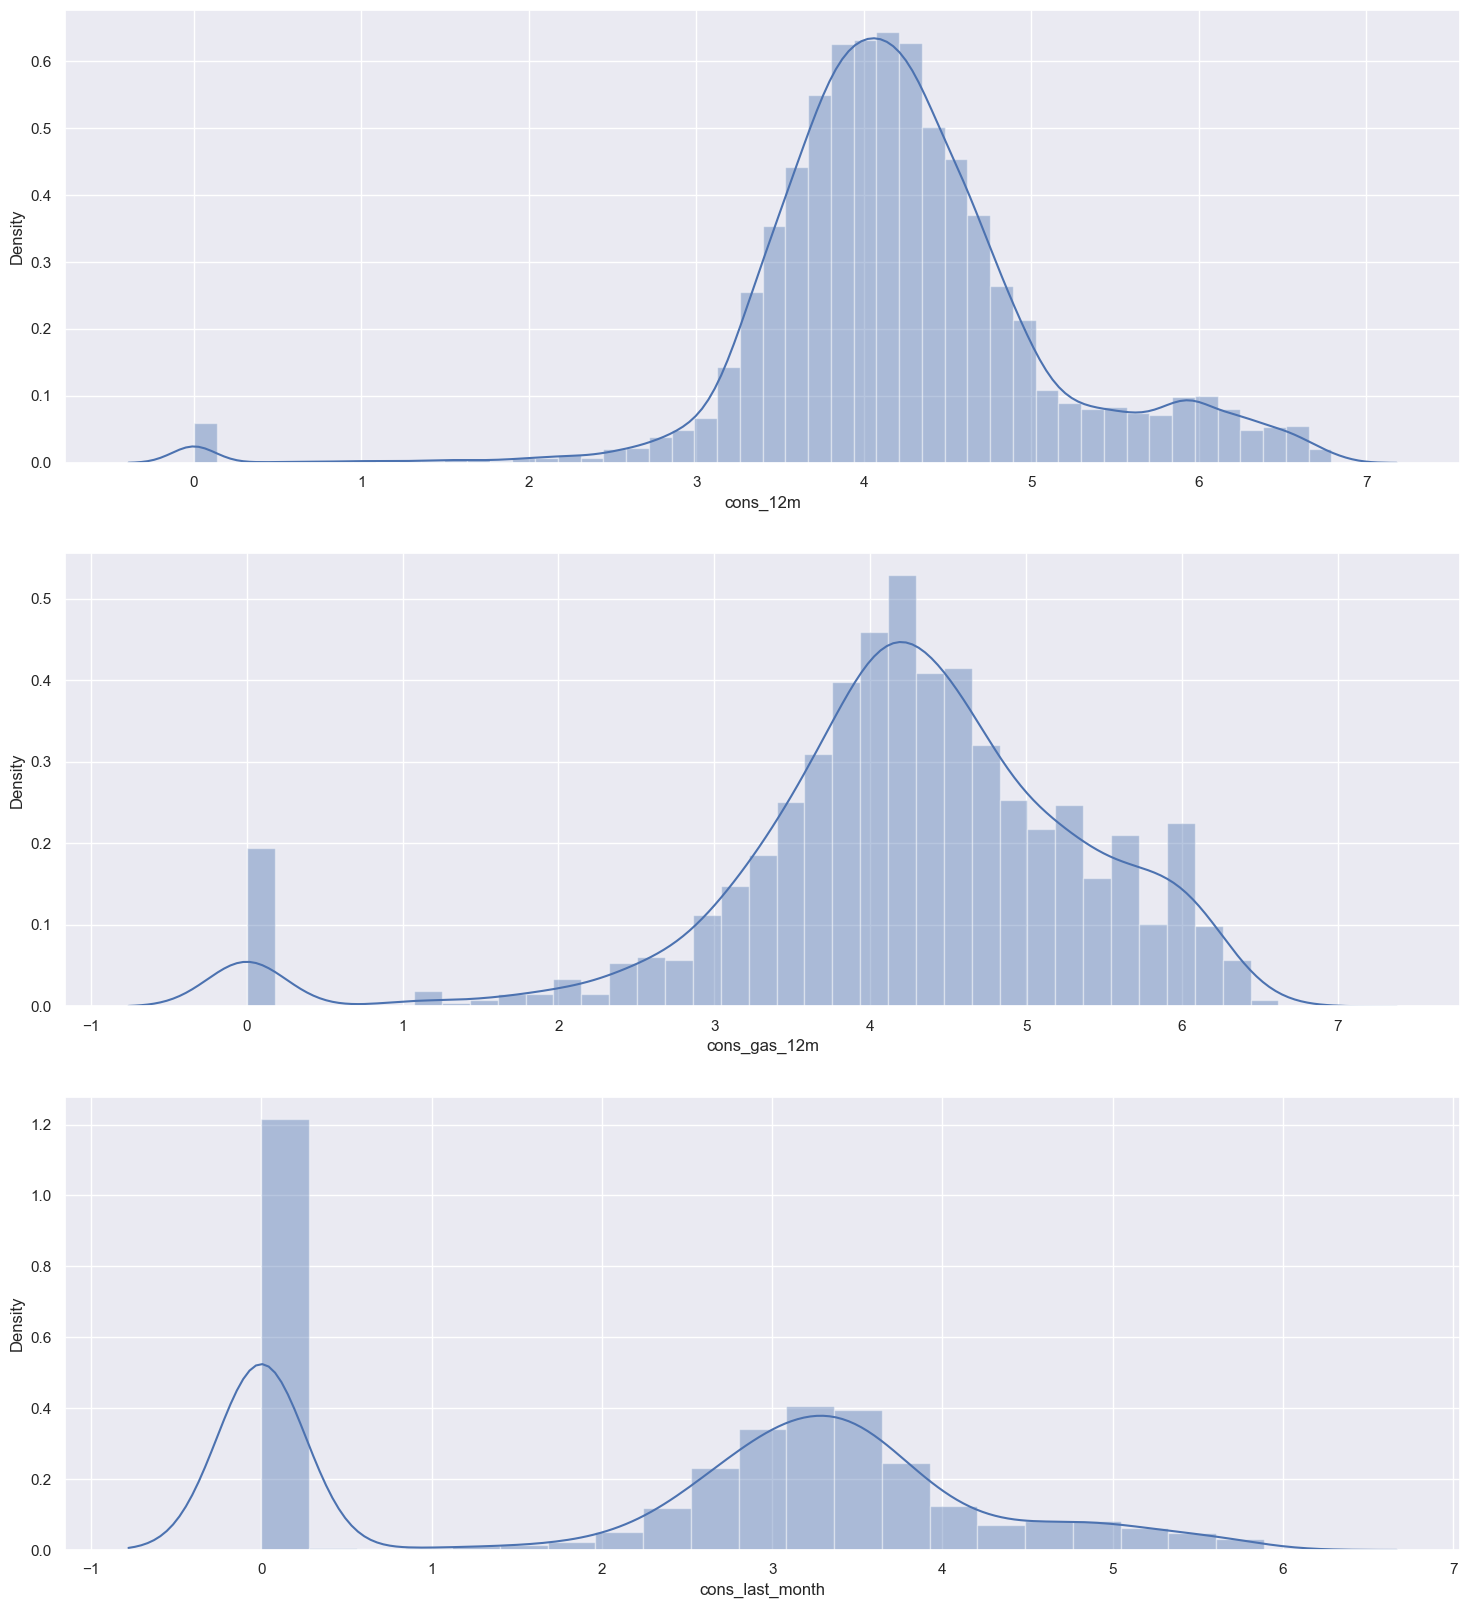

In [260]:
fig, axs = plt.subplots(nrows=3, figsize=(18, 20))
# Plot histograms
sns.distplot((df["cons_12m"].dropna()), ax=axs[0])
sns.distplot((df[df["has_gas"]==1]["cons_gas_12m"].dropna()), ax=axs[1])
sns.distplot((df["cons_last_month"].dropna()), ax=axs[2])
plt.show()

### Correlations

In terms of creating new features and transforming existing ones, it is very much a trial and error situation that requires iteration. Once we train a predictive model we can see which features work and don't work, we will also know how predictive this set of features is. Based on this, we can come back to feature engineering to enhance our model. 

For now, we will leave feature engineering at this point. Another thing that is always useful to look at is how correlated all of the features are within your dataset.

This is important because it reveals the linear relationships between features. We want features to correlate with `churn`, as this will indicate that they are good predictors of it. However features that have a very high correlation can sometimes be suspicious. This is because 2 columns that have high correlation indicates that they may share a lot of the same information. One of the assumptions of any parametric predictive model (as stated earlier) is that all features must be independent.

For features to be independent, this means that each feature must have absolutely no dependence on any other feature. If two features are highly correlated and share similar information, this breaks this assumption. 

Ideally, you want a set of features that have 0 correlation with all of the independent variables (all features except our target variable) and a high correlation with the target variable (churn). However, this is very rarely the case and it is common to have a small degree of correlation between independent features.

So now let's look at how all the features within the model are correlated.

In [226]:
correlation = df.drop('id', axis=1).corr()


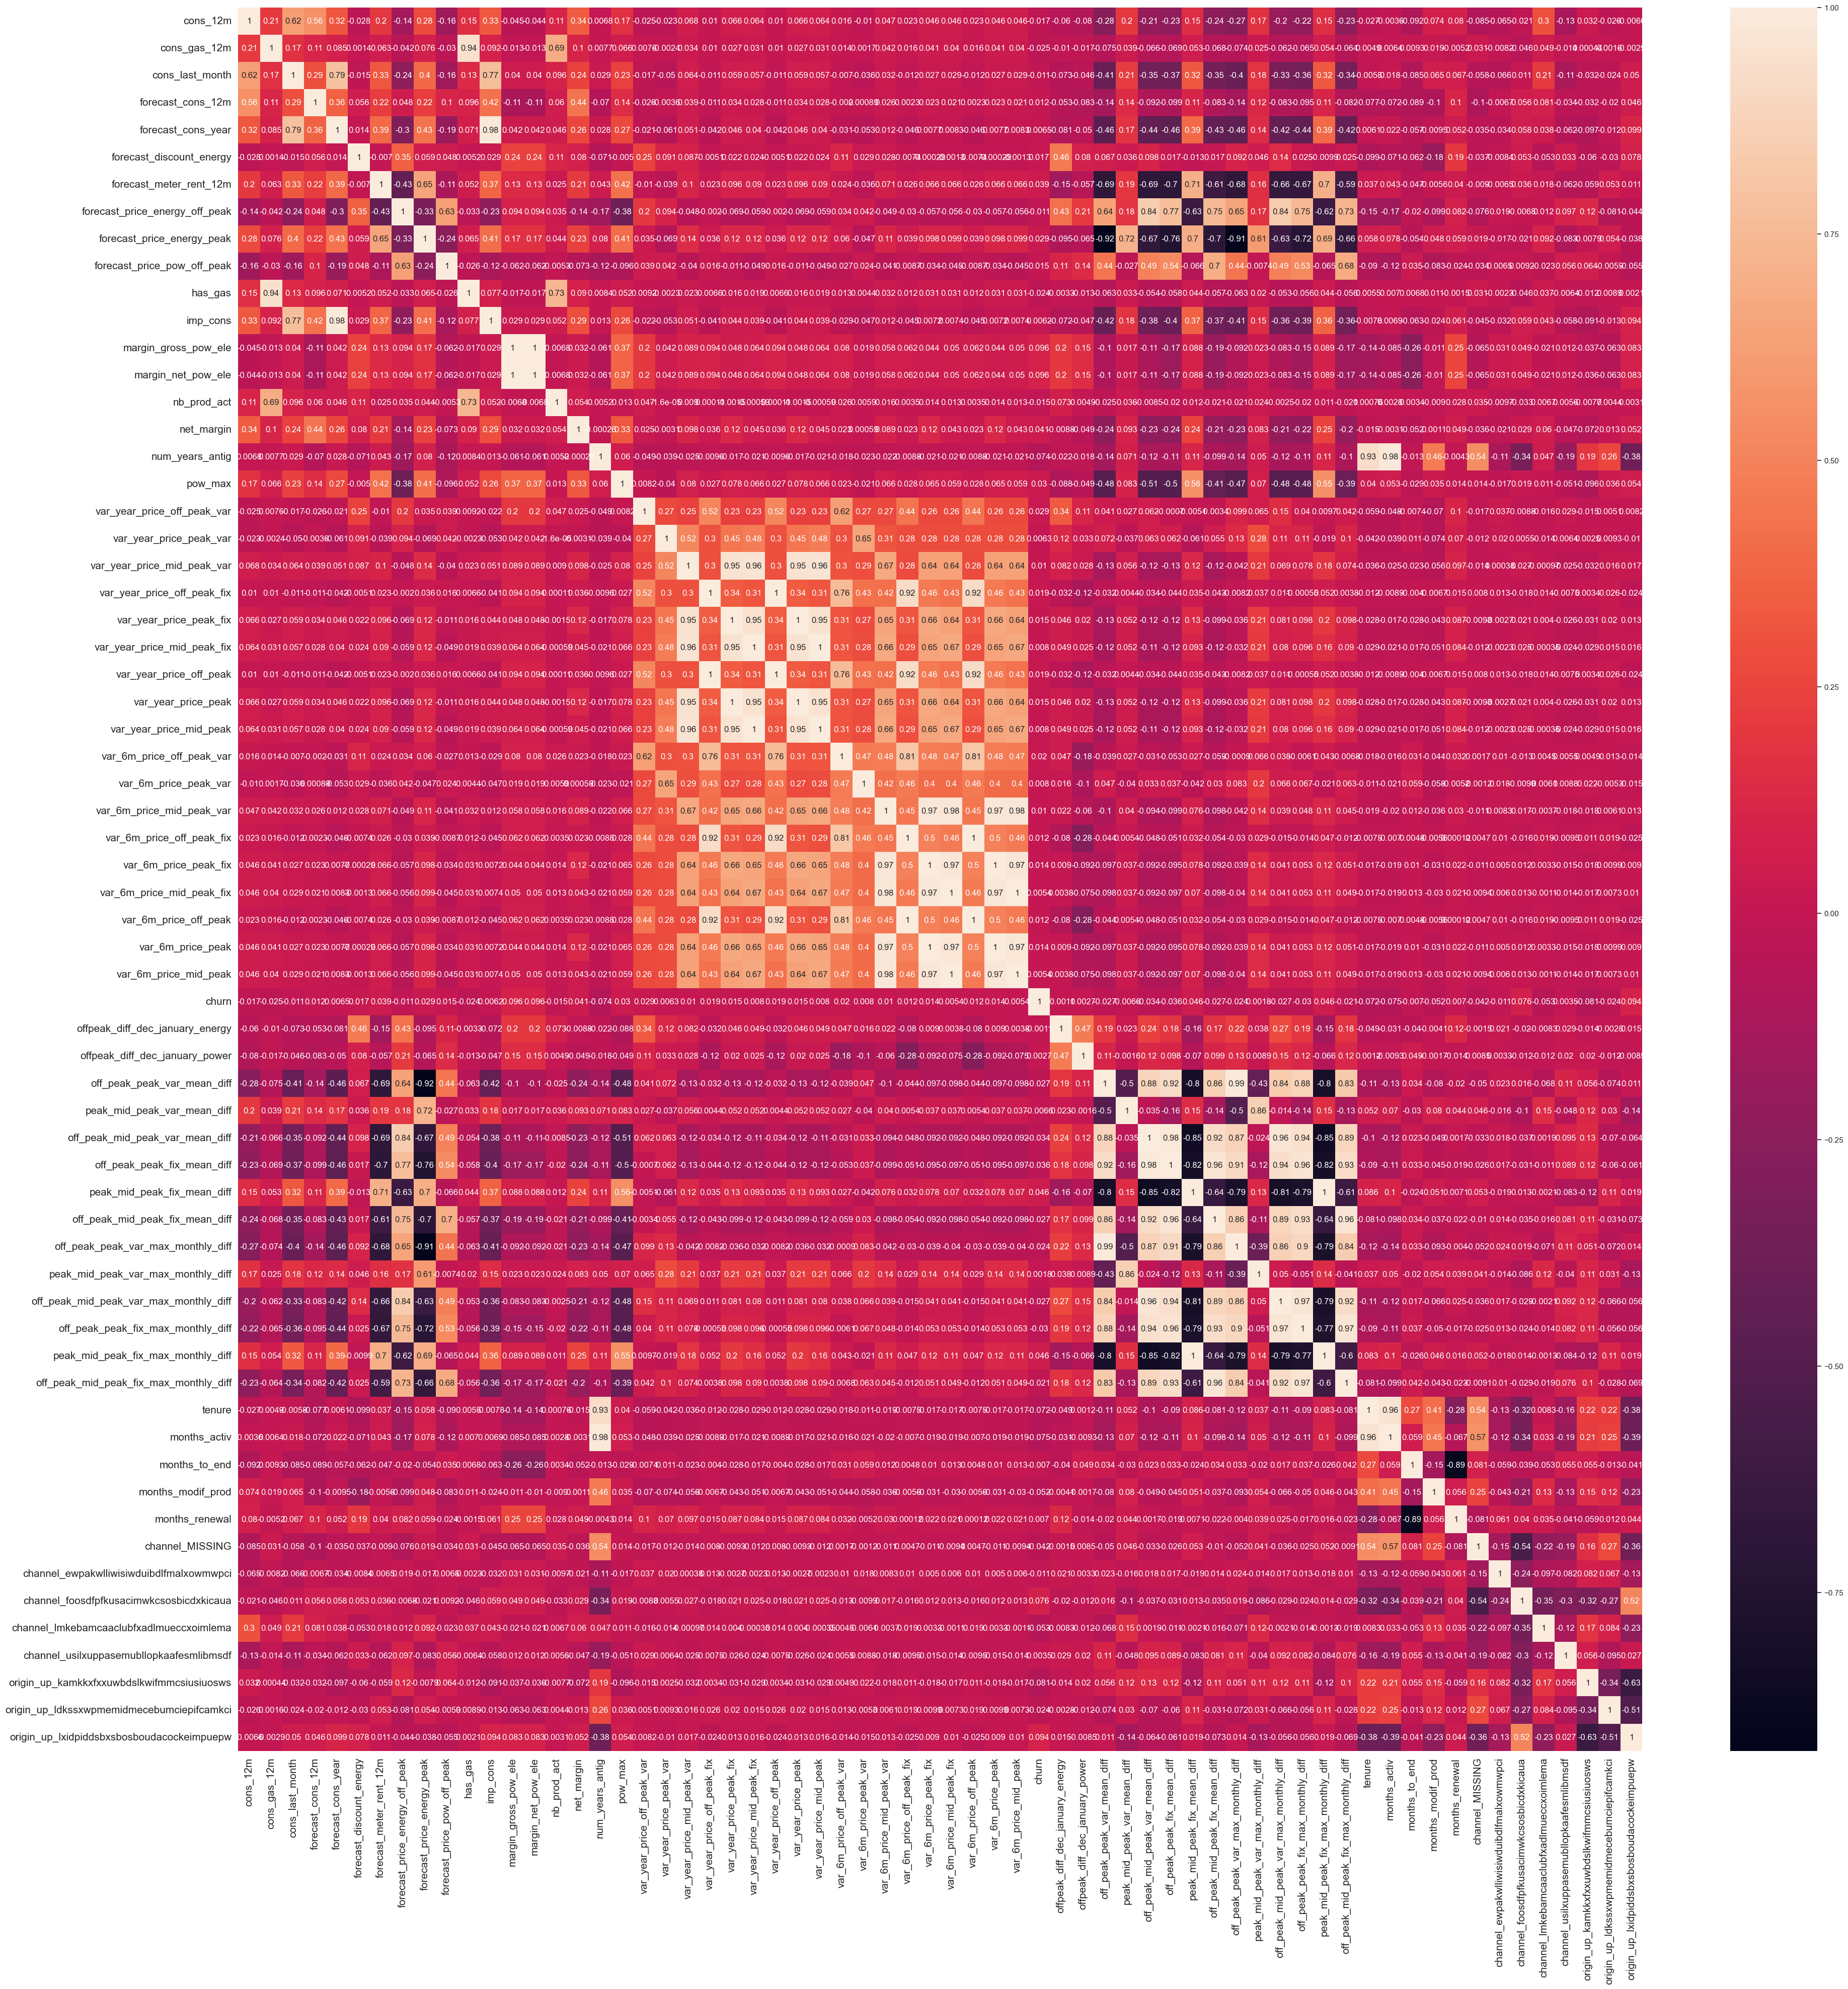

In [227]:
# Plot correlation
plt.figure(figsize=(45, 45))
sns.heatmap(
    correlation, 
    xticklabels=correlation.columns.values,
    yticklabels=correlation.columns.values, 
    annot=True, 
    annot_kws={'size': 12}
)
# Axis ticks size
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

There are several insights to draw from this heatmap. Some features appear to be redundant, while others show signs of multicollinearity. For now, I will remove two variables that exhibit a high correlation with other independent features.

In [228]:
df = df.drop(columns=['num_years_antig', 'forecast_cons_year'])
df.head(2)

id  cons_12m  cons_gas_12m  cons_last_month  \
0  24011ae4ebbe3035111d65fa7c15bc57  0.000000      4.739944              0.0   
1  d29c2c54acc38ff3c0614d0a653813dd  3.668479      0.000000              0.0   

   forecast_cons_12m  forecast_discount_energy  forecast_meter_rent_12m  \
0            0.00000                       0.0                 0.444045   
1            2.28092                       0.0                 1.237292   

   forecast_price_energy_off_peak  forecast_price_energy_peak  \
0                        0.114481                    0.098142   
1                        0.145711                    0.000000   

   forecast_price_pow_off_peak  has_gas  imp_cons  margin_gross_pow_ele  \
0                    40.606701        1       0.0                 25.44   
1                    44.311378        0       0.0                 16.38   

   margin_net_pow_ele  nb_prod_act  net_margin  pow_max  \
0               25.44            2      678.99   43.648   
1               16.38            1       18.89   13.800   

   var_year_price_off_peak_var  var_year_price_peak_var  \
0                     0.000061                 0.000026   
1                     0.000005                 0.000609   

   var_year_price_mid_peak_var  var_year_price_off_peak_fix  \
0                      0.00044                     1.102785   
1                      0.00000                     0.006465   

   var_year_price_peak_fix  var_year_price_mid_peak_fix  \
0                49.550703                    22.022535   
1                 0.000000                     0.000000   

   var_year_price_off_peak  var_year_price_peak  var_year_price_mid_peak  \
0                 1.102846            49.550729                22.022975   
1                 0.006470             0.000609                 0.000000   

   var_6m_price_off_peak_var  var_6m_price_peak_var  \
0                   0.000131               0.000041   
1                   0.000003               0.001218   

   var_6m_price_mid_peak_var  var_6m_price_off_peak_fix  \
0                   0.000908                   2.086294   
1                   0.000000                   0.009482   

   var_6m_price_peak_fix  var_6m_price_mid_peak_fix  var_6m_price_off_peak  \
0              99.530517                  44.235794               2.086425   
1               0.000000                   0.000000               0.009485   

   var_6m_price_peak  var_6m_price_mid_peak  churn  \
0          99.530558              44.236702      1   
1           0.001218               0.000000      0   

   offpeak_diff_dec_january_energy  offpeak_diff_dec_january_power  \
0                         0.020057                        3.700961   
1                        -0.003767                        0.177779   

   off_peak_peak_var_mean_diff  peak_mid_peak_var_mean_diff  \
0                     0.024038                     0.034219   
1                     0.142485                     0.007124   

   off_peak_mid_peak_var_mean_diff  off_peak_peak_fix_mean_diff  \
0                         0.058257                    18.590255   
1                         0.149609                    44.311375   

   peak_mid_peak_fix_mean_diff  off_peak_mid_peak_fix_mean_diff  \
0                      7.45067                        26.040925   
1                      0.00000                        44.311375   

   off_peak_peak_var_max_monthly_diff  peak_mid_peak_var_max_monthly_diff  \
0                            0.060550                            0.085483   
1                            0.151367                            0.085483   

   off_peak_mid_peak_var_max_monthly_diff  off_peak_peak_fix_max_monthly_diff  \
0                                0.146033                            44.26693   
1                                0.151367                            44.44471   

   peak_mid_peak_fix_max_monthly_diff  off_peak_mid_peak_fix_max_monthly_diff  \
0                            8.145775                                44.26693   
1     

# Task 4 - Modeling and Evaluation

Now, the data is ready to be used for model training, i will train multiple models including Random forest 

In [229]:
y = df['churn']
X = df.drop(columns=['id', 'churn'])
print(X.shape)
print(y.shape)

(14606, 61)
(14606,)


In [233]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)


(10954, 61)
(10954,)
(3652, 61)
(3652,)


In [235]:
## i used minmax scaler because it scales between 0 and 1 and originally have 0's and 1's in my dataset, needed to be  consistent with that 

scaler = MinMaxScaler()
scaler.fit(X_train)

MinMaxScaler()

In [236]:
x_train_scaled= scaler.transform(X_train)
x_test_scaled = scaler.transform(X_test)

<Axes: xlabel='churn', ylabel='count'>

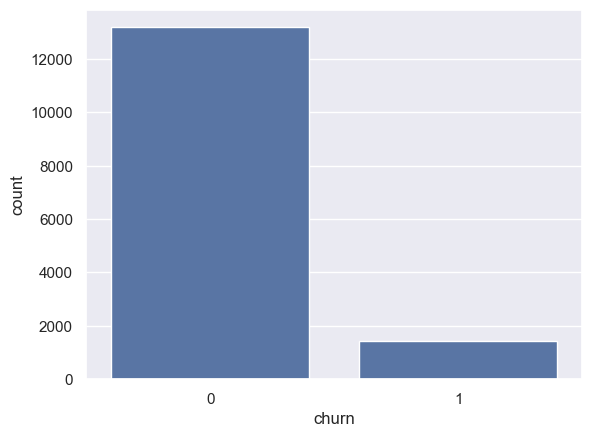

In [237]:
sns.countplot(data = df,x = 'churn')

# INSIGHT:

### It’s clear that the target variable is imbalanced, which poses a common challenge in classification tasks and can lead to the accuracy paradox, where a model appears to perform well based on accuracy but actually fails to capture the minority class effectively. To address this, I will apply resampling techniques and compare model performance with and without resampling.

#### If you're interested in learning more about the accuracy paradox, feel free to check out my blog post on Medium:
### 🔗 [Beware of the Accuracy Trap](https://medium.com/@edosomapatrick41/beware-of-the-accuracy-trap-4785d07cdd8a)

In [238]:
from imblearn.under_sampling import TomekLinks,NearMiss
from imblearn.over_sampling import RandomOverSampler,SMOTE
from imblearn.combine import SMOTETomek

def sampler_function(data_x, data_y, sampler = 0, random_state = 42):
    
    if sampler == 0:
        sampler = RandomOverSampler(random_state = random_state)
    elif sampler == 1:
        sampler = TomekLinks()
    elif sampler == 2:
        sampler = SMOTE()
    elif sampler == 3:
        sampler = SMOTETomek()
    else: 
        sampler = NearMiss()
    X_transformed, y_transformed = sampler.fit_resample(data_x, data_y)
    
    print('Original dataset shape:', data_y.shape)
    print('Resample dataset shape:', y_transformed.shape)
    
    return X_transformed, y_transformed

In [239]:
X_train_res, y_train_res = sampler_function(x_train_scaled, y_train,sampler =2)

Original dataset shape: (10954,)
Resample dataset shape: (19802,)


In [240]:
## Oversampled successfully with smote 

y_train_res.value_counts()

churn
1    9901
0    9901
Name: count, dtype: int64

In [241]:

def train_and_evaluate_classifiers(X_train, X_test, y_train, y_test):
    models = {
        "Logistic Regression": LogisticRegression(max_iter=1000),
        "Decision Tree": DecisionTreeClassifier(),
        "Random Forest": RandomForestClassifier(),
        "Gradient Boosting": GradientBoostingClassifier(),
        "AdaBoost": AdaBoostClassifier(),
        "K-Nearest Neighbors": KNeighborsClassifier()
        
    }

    results = []

    for model_name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        acc = accuracy_score(y_test, y_pred)
        prec_0 = precision_score(y_test, y_pred, pos_label=0)
        prec_1 = precision_score(y_test, y_pred, pos_label=1)
        rec_0 = recall_score(y_test, y_pred, pos_label=0)
        rec_1 = recall_score(y_test, y_pred, pos_label=1)
        f1_0 = f1_score(y_test, y_pred, pos_label=0)
        f1_1 = f1_score(y_test, y_pred, pos_label=1)
        cv_acc = np.mean(cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy'))

        results.append([
            model_name, acc, prec_0, prec_1, rec_0, rec_1, f1_0, f1_1, cv_acc
        ])

    results_df = pd.DataFrame(results, columns=[
        "Model", "Accuracy", "Precision (0)", "Precision (1)",
        "Recall (0)", "Recall (1)", "F1 Score (0)", "F1 Score (1)", "CV Accuracy"
    ])

    return results_df


In [242]:
Model_performance_WITHOUT_resampling_techniques = train_and_evaluate_classifiers(x_train_scaled, x_test_scaled, y_train, y_test)


In [243]:
Model_performance_WITHOUT_resampling_techniques

Model  Accuracy  Precision (0)  Precision (1)  Recall (0)  \
0  Logistic Regression  0.899507       0.900192       0.400000    0.999087   
1        Decision Tree  0.829409       0.911338       0.190361    0.897748   
2        Random Forest  0.902793       0.903608       0.761905    0.998478   
3    Gradient Boosting  0.900329       0.901153       0.600000    0.998783   
4             AdaBoost  0.898686       0.900110       0.250000    0.998174   
5  K-Nearest Neighbors  0.894304       0.903002       0.314815    0.988740   

   Recall (1)  F1 Score (0)  F1 Score (1)  CV Accuracy  
0    0.005464      0.947065      0.010782     0.903140  
1    0.215847      0.904492      0.202305     0.834673  
2    0.043716      0.948677      0.082687     0.907431  
3    0.016393      0.947460      0.031915     0.902958  
4    0.005464      0.946609      0.010695     0.903597  
5    0.046448      0.943928      0.080952     0.897115

In [244]:
Model_performance_with_resampling_techniques = train_and_evaluate_classifiers(X_train_res, x_test_scaled, y_train_res, y_test)

In [245]:
Model_performance_with_resampling_techniques

Model  Accuracy  Precision (0)  Precision (1)  Recall (0)  \
0  Logistic Regression  0.596112       0.920967       0.130580    0.602861   
1        Decision Tree  0.806134       0.909987       0.163386    0.870663   
2        Random Forest  0.899233       0.910523       0.489796    0.984784   
3    Gradient Boosting  0.852957       0.910666       0.219672    0.927572   
4             AdaBoost  0.771632       0.911133       0.150746    0.826841   
5  K-Nearest Neighbors  0.717963       0.919019       0.154167    0.752891   

   Recall (1)  F1 Score (0)  F1 Score (1)  CV Accuracy  
0    0.535519      0.728711      0.209963     0.633522  
1    0.226776      0.889891      0.189931     0.869966  
2    0.131148      0.946199      0.206897     0.952787  
3    0.183060      0.919041      0.199702     0.881331  
4    0.275956      0.866943      0.194981     0.802449  
5    0.404372      0.827702      0.223228     0.838906

As expected, models trained on imbalanced data—without resampling or stratification—produced misleadingly high accuracy but performed poorly in capturing the minority class. Although the performance after applying resampling techniques like SMOTE was not exceptionally strong, it showed meaningful improvement compared to the original setup.

 After resampling, Random Forest emerged as the best-performing model with a cross-validation accuracy of 95%.

 For this phase of the project, I intentionally kept things simple to focus on generating actionable insights. However, if further performance improvement is required by my team lead , I would have explored these steps :

 -- Feature engineering: Creating more new features or transforming existing ones to better capture patterns.

 -- Feature selection: Dropping redundant or low-importance features based on importance scores.

 -- Hyperparameter tuning: Optimizing model parameters using techniques like GridSearchCV.

#### Implementing the steps above would definitely improve the model performance

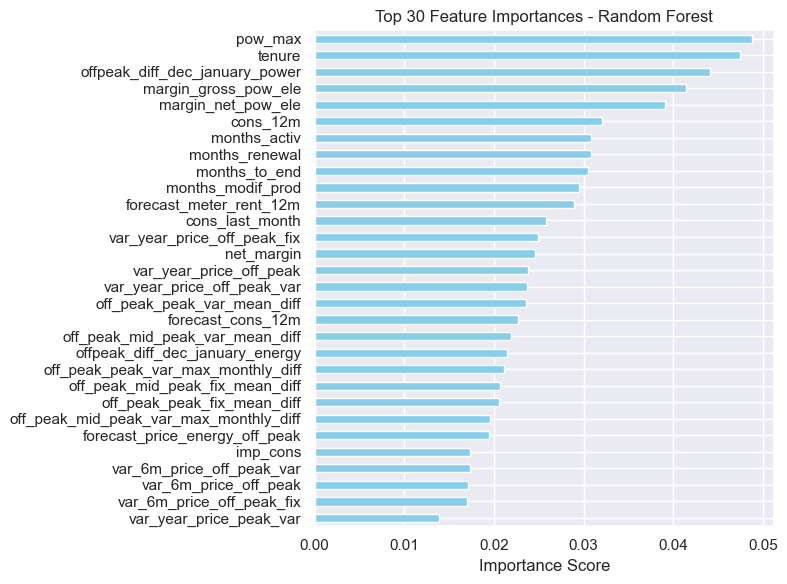

In [254]:
# Checking feature importance for my analysis


rf = RandomForestClassifier()
rf.fit(X_train_res, y_train_res)
importances = pd.Series(rf.feature_importances_, index=X_train.columns)
top_features = importances.sort_values(ascending=False).head(30)

plt.figure(figsize=(8, 6))
top_features.plot(kind='barh', color='skyblue')
plt.title('Top 30 Feature Importances - Random Forest')
plt.xlabel('Importance Score')
plt.gca().invert_yaxis()  # Most important on top
plt.tight_layout()
plt.show()

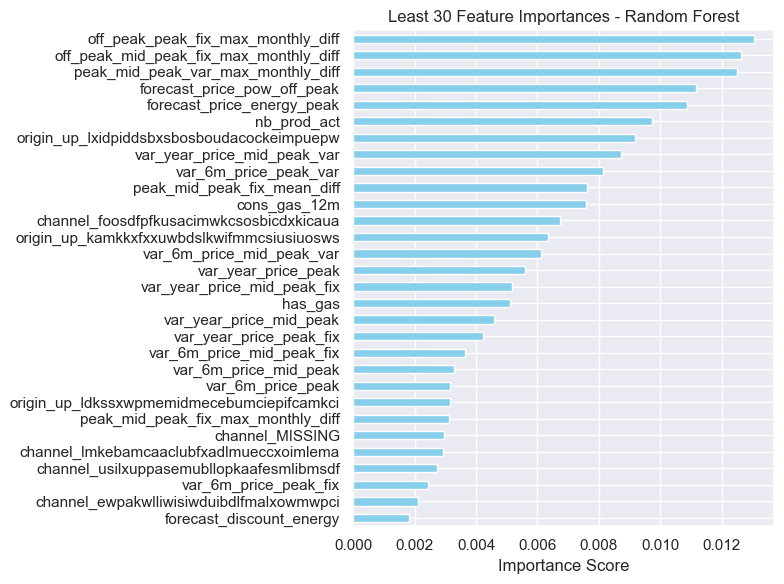

In [256]:
top_features = importances.sort_values(ascending=False).tail(30)

plt.figure(figsize=(8, 6))
top_features.plot(kind='barh', color='skyblue')
plt.title('Least 30 Feature Importances - Random Forest')
plt.xlabel('Importance Score')
plt.gca().invert_yaxis()  # Most important on top
plt.tight_layout()
plt.show()

From these charts, we can observe the following points:

- pow_max and tenure  and offpeak_diff_dec_january_power are top drivers for churn in this model
- Margin on power subscription also is an influential driver
- Time seems to be an influential factor, especially the number of months they have been active, their tenure and the number of months since they updated their contract
  
- Our price sensitivity features are scattered around but are not the main driver for a customer churning

This last observation is important because this relates back to our original hypothesis:

    > Is churn driven by the customers' price sensitivity?

Based on the output of the feature importances, it is not a main driver but it is a weak contributor.

### Final Insights and Recommendations 

Churn is indeed high in the SME division with  9.7% across 14606 customers

Predictive model is able to predict churn but the
main driver is not customer price sensitivity

• pow_max and tenure and net margin are the largest drivers

•  Discount strategy of 20% is effective but only if
targeted appropriately

• Offer discount to only to high-value customers
with high churn probability

## THE END 

# MY Portfolio: https://www.datascienceportfol.io/Patrick090
